In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

수정사항
1. L2 error norm ($\epsilon$)의 정의가 변경되었습니다.(루트 삭제)

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [4]:
x_csv = pd.read_csv('x_input(15_sensors).csv', header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x = x_csv[-37:-1, :15]

In [7]:
x.shape

(36, 15)

In [8]:
x = x.reshape((36, 15, 1))

In [9]:
y_csv = pd.read_csv('y_output(TSR2.0).csv', header=None)

In [10]:
y_csv = y_csv.to_numpy(dtype='float32')

In [11]:
y = y_csv[-3601:-1, :]

In [12]:
y = y.reshape((36, 100, 100))

"ax = plt.subplot(6, 6, 1)\n#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)\n#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)\na1 = plt.contourf(xmesh, ymesh, y[0].T, levels=16, cmap=cmap)\nax.set_xlabel('x/D', fontsize=15)\nax.set_ylabel('y/D', fontsize=15)\n#ax.get_xaxis().set_visible(False)\n#ax.get_yaxis().set_visible(False)\nax.set_title('Original test image', fontsize=15)\n\n# Display reconstruction\nax = plt.subplot(6, 6, 2)\n#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)\n#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)\na2 = plt.contourf(xmesh, ymesh, y[1].T, levels=16, cmap=cmap)\nax.set_xlabel('x/D', fontsize=15)\nax.set_ylabel('y/D', fontsize=15)\n#ax.get_xaxis().set_visible(False)\n#ax.get_yaxis().set_visible(False)\nax.set_title('Reconstructed image', fontsize=15)"

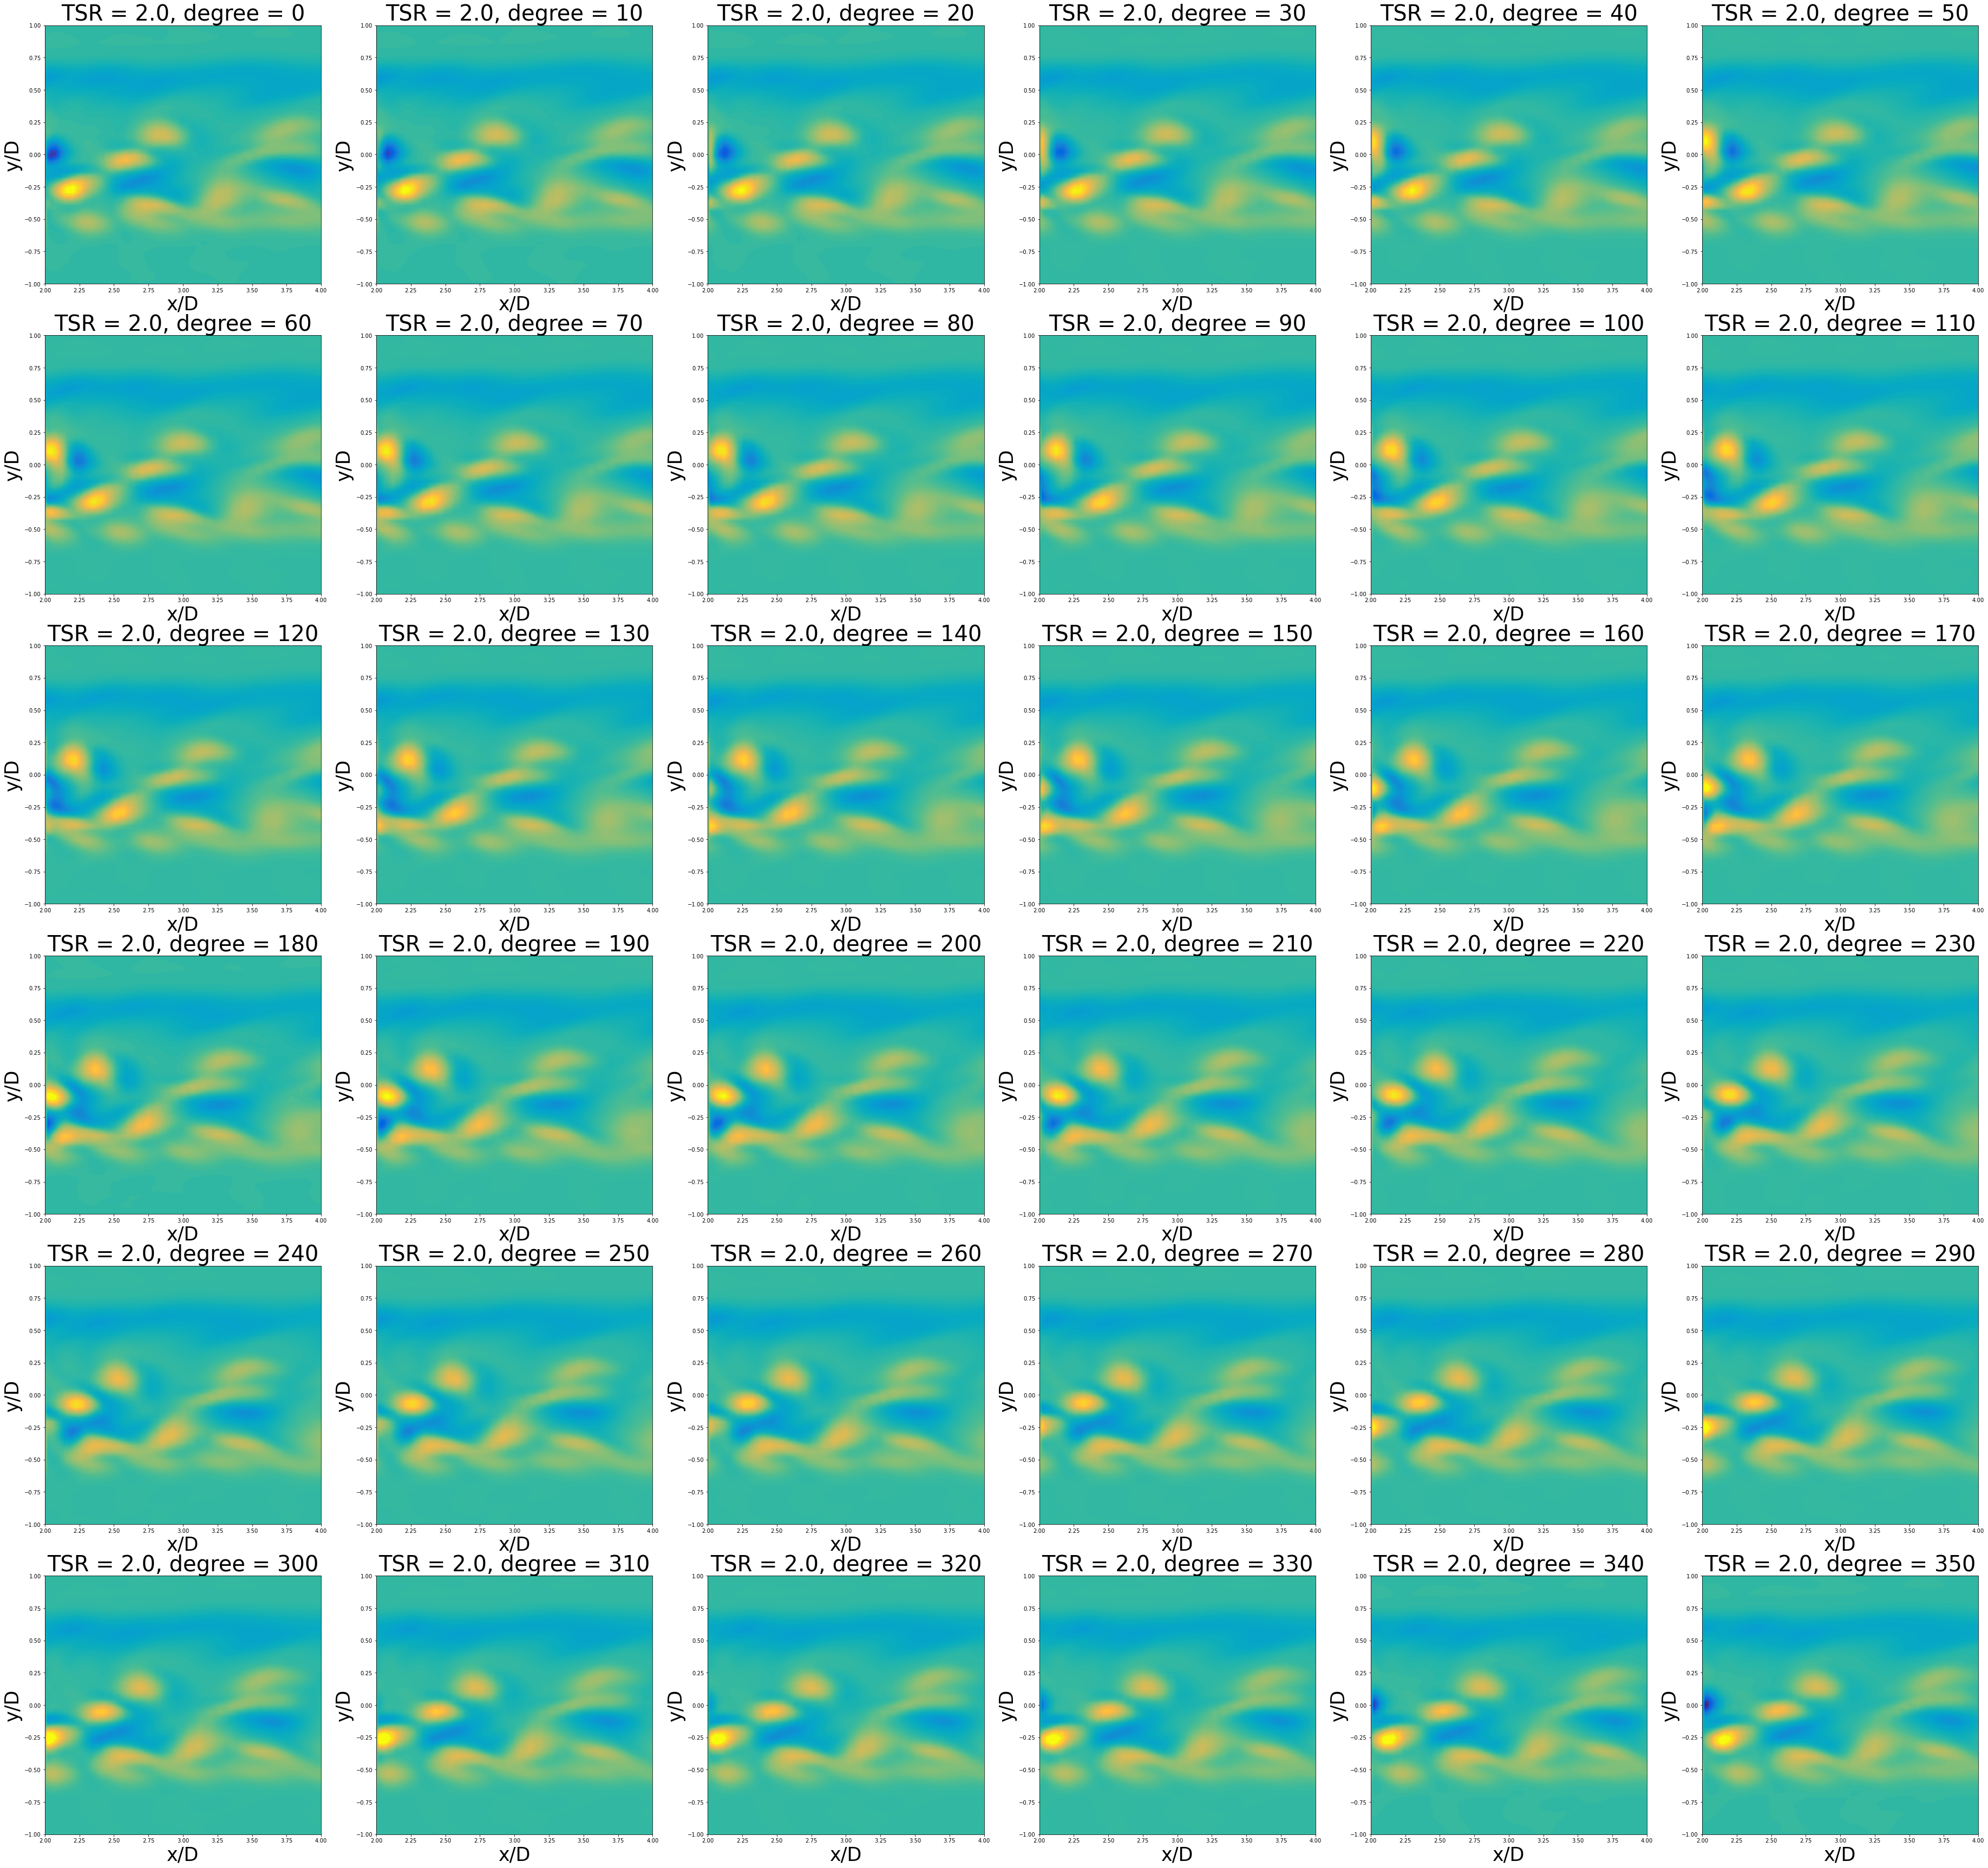

In [13]:
fig = plt.figure(figsize=(64, 72))

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

for i in range(0, 36):
    ax = fig.add_subplot(7, 6, i+1)
    ax.contourf(xmesh, ymesh, y[i], vmin=-0.7, vmax=0.7, levels=128, cmap=cmap)
    ax.set_xlabel('x/D', fontsize=35)
    ax.set_ylabel('y/D', fontsize=35)
    ax.set_title('TSR = 2.0, degree = %d' %(i*10), fontsize=40)

'''ax = plt.subplot(6, 6, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y[0].T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(6, 6, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, y[1].T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)'''

#cax = plt.axes([0.95, 0.15, 0.05, 0.73])
#cbar = plt.colorbar(ax, cax=cax)
#cbar.set_label('Dimensionless vorticity', fontsize=15)
#cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

#plt.suptitl

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.28, random_state=42)

In [15]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer')(reshape)
x = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer')(x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer')(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [16]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2048      
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 thirdHiddenLayer (Dense)    (None, 128)               16512     
                                                                 
 outputLayer (Dense)         (None, 10000)             1290000   
                                                                 
 reshape_1 (Reshape)         (None, 100, 100)          0     

In [17]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [18]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
1/1 [==============================] - 1s 797ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 2/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 3/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 4/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1116
Epoch 5/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0124 - rmse: 0.1115
Epoch 6/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1115
Epoch 7/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0124 - rmse: 0.1114
Epoch 8/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1113
Epoch 9/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 10/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 11/10000
1/1 [===========================

1/1 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 87/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 88/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 89/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0889
Epoch 90/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 91/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0878
Epoch 92/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 93/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 94/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 95/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 96/10000
1/1 [==============================] - 0

1/1 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 171/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0682
Epoch 172/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 173/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 174/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 175/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 176/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 177/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 178/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 179/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0667
Epoch 180/10000
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 255/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 256/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 257/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 258/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 259/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 260/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 261/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 262/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 263/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 264/10000
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 339/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 340/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 341/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 342/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 343/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 344/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 345/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0430
Epoch 346/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 347/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 348/10000
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 423/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 424/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 425/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 426/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 427/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 428/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 429/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 430/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 431/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 432/10000
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 507/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 508/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 509/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 510/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 511/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 512/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 513/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 514/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 515/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 516/10000
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 9.0258e-04 - rmse: 0.0300
Epoch 589/10000
1/1 [==============================] - 0s 3ms/step - loss: 9.0044e-04 - rmse: 0.0300
Epoch 590/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.9831e-04 - rmse: 0.0300
Epoch 591/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.9619e-04 - rmse: 0.0299
Epoch 592/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.9407e-04 - rmse: 0.0299
Epoch 593/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9196e-04 - rmse: 0.0299
Epoch 594/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8985e-04 - rmse: 0.0298
Epoch 595/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8773e-04 - rmse: 0.0298
Epoch 596/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8560e-04 - rmse: 0.0298
Epoch 597/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8347e-04 - rmse: 0.0297
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 7.4751e-04 - rmse: 0.0273
Epoch 670/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.4589e-04 - rmse: 0.0273
Epoch 671/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.4428e-04 - rmse: 0.0273
Epoch 672/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.4268e-04 - rmse: 0.0273
Epoch 673/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.4109e-04 - rmse: 0.0272
Epoch 674/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3950e-04 - rmse: 0.0272
Epoch 675/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3792e-04 - rmse: 0.0272
Epoch 676/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.3634e-04 - rmse: 0.0271
Epoch 677/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3478e-04 - rmse: 0.0271
Epoch 678/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3322e-04 - rmse: 0.0271
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 6.4217e-04 - rmse: 0.0253
Epoch 751/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.4115e-04 - rmse: 0.0253
Epoch 752/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4013e-04 - rmse: 0.0253
Epoch 753/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3913e-04 - rmse: 0.0253
Epoch 754/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.3813e-04 - rmse: 0.0253
Epoch 755/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3714e-04 - rmse: 0.0252
Epoch 756/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3618e-04 - rmse: 0.0252
Epoch 757/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.3518e-04 - rmse: 0.0252
Epoch 758/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3422e-04 - rmse: 0.0252
Epoch 759/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3325e-04 - rmse: 0.0252
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 5.7442e-04 - rmse: 0.0240
Epoch 832/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7371e-04 - rmse: 0.0240
Epoch 833/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.7301e-04 - rmse: 0.0239
Epoch 834/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.7232e-04 - rmse: 0.0239
Epoch 835/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7162e-04 - rmse: 0.0239
Epoch 836/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.7093e-04 - rmse: 0.0239
Epoch 837/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.7024e-04 - rmse: 0.0239
Epoch 838/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6955e-04 - rmse: 0.0239
Epoch 839/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.6887e-04 - rmse: 0.0239
Epoch 840/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.6819e-04 - rmse: 0.0238
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 5.2571e-04 - rmse: 0.0229
Epoch 913/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2519e-04 - rmse: 0.0229
Epoch 914/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2469e-04 - rmse: 0.0229
Epoch 915/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2419e-04 - rmse: 0.0229
Epoch 916/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2370e-04 - rmse: 0.0229
Epoch 917/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2321e-04 - rmse: 0.0229
Epoch 918/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2272e-04 - rmse: 0.0229
Epoch 919/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2224e-04 - rmse: 0.0229
Epoch 920/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2175e-04 - rmse: 0.0228
Epoch 921/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2126e-04 - rmse: 0.0228
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 4.9096e-04 - rmse: 0.0222
Epoch 994/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9059e-04 - rmse: 0.0221
Epoch 995/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.9023e-04 - rmse: 0.0221
Epoch 996/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.8986e-04 - rmse: 0.0221
Epoch 997/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.8949e-04 - rmse: 0.0221
Epoch 998/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.8913e-04 - rmse: 0.0221
Epoch 999/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.8877e-04 - rmse: 0.0221
Epoch 1000/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.8841e-04 - rmse: 0.0221
Epoch 1001/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.8806e-04 - rmse: 0.0221
Epoch 1002/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.8769e-04 - rmse: 0.0221
Epo

1/1 [==============================] - 0s 5ms/step - loss: 4.6554e-04 - rmse: 0.0216
Epoch 1074/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.6527e-04 - rmse: 0.0216
Epoch 1075/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6499e-04 - rmse: 0.0216
Epoch 1076/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6471e-04 - rmse: 0.0216
Epoch 1077/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6445e-04 - rmse: 0.0216
Epoch 1078/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6418e-04 - rmse: 0.0215
Epoch 1079/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6391e-04 - rmse: 0.0215
Epoch 1080/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6365e-04 - rmse: 0.0215
Epoch 1081/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6339e-04 - rmse: 0.0215
Epoch 1082/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6312e-04 - rmse: 0.02

1/1 [==============================] - 0s 4ms/step - loss: 4.4615e-04 - rmse: 0.0211
Epoch 1154/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4594e-04 - rmse: 0.0211
Epoch 1155/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4575e-04 - rmse: 0.0211
Epoch 1156/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4553e-04 - rmse: 0.0211
Epoch 1157/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4532e-04 - rmse: 0.0211
Epoch 1158/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4511e-04 - rmse: 0.0211
Epoch 1159/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4490e-04 - rmse: 0.0211
Epoch 1160/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4470e-04 - rmse: 0.0211
Epoch 1161/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.4449e-04 - rmse: 0.0211
Epoch 1162/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4429e-04 - rmse: 0.02

1/1 [==============================] - 0s 4ms/step - loss: 4.3095e-04 - rmse: 0.0208
Epoch 1234/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3077e-04 - rmse: 0.0208
Epoch 1235/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.3059e-04 - rmse: 0.0208
Epoch 1236/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3042e-04 - rmse: 0.0207
Epoch 1237/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3025e-04 - rmse: 0.0207
Epoch 1238/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.3007e-04 - rmse: 0.0207
Epoch 1239/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.2990e-04 - rmse: 0.0207
Epoch 1240/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2973e-04 - rmse: 0.0207
Epoch 1241/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2955e-04 - rmse: 0.0207
Epoch 1242/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.2938e-04 - rmse: 0.02

1/1 [==============================] - 0s 4ms/step - loss: 4.1763e-04 - rmse: 0.0204
Epoch 1314/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1746e-04 - rmse: 0.0204
Epoch 1315/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1730e-04 - rmse: 0.0204
Epoch 1316/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1714e-04 - rmse: 0.0204
Epoch 1317/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1698e-04 - rmse: 0.0204
Epoch 1318/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1682e-04 - rmse: 0.0204
Epoch 1319/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1666e-04 - rmse: 0.0204
Epoch 1320/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1650e-04 - rmse: 0.0204
Epoch 1321/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.1634e-04 - rmse: 0.0204
Epoch 1322/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1617e-04 - rmse: 0.02

1/1 [==============================] - 0s 3ms/step - loss: 4.0491e-04 - rmse: 0.0201
Epoch 1394/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0476e-04 - rmse: 0.0201
Epoch 1395/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.0460e-04 - rmse: 0.0201
Epoch 1396/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0444e-04 - rmse: 0.0201
Epoch 1397/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.0428e-04 - rmse: 0.0201
Epoch 1398/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.0412e-04 - rmse: 0.0201
Epoch 1399/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.0396e-04 - rmse: 0.0201
Epoch 1400/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0380e-04 - rmse: 0.0201
Epoch 1401/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.0364e-04 - rmse: 0.0201
Epoch 1402/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0348e-04 - rmse: 0.02

1/1 [==============================] - 0s 6ms/step - loss: 3.9203e-04 - rmse: 0.0198
Epoch 1474/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9187e-04 - rmse: 0.0198
Epoch 1475/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9170e-04 - rmse: 0.0198
Epoch 1476/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9154e-04 - rmse: 0.0198
Epoch 1477/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9138e-04 - rmse: 0.0198
Epoch 1478/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9121e-04 - rmse: 0.0198
Epoch 1479/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.9103e-04 - rmse: 0.0198
Epoch 1480/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9087e-04 - rmse: 0.0198
Epoch 1481/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9070e-04 - rmse: 0.0198
Epoch 1482/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.9053e-04 - rmse: 0.01

1/1 [==============================] - 0s 4ms/step - loss: 3.7822e-04 - rmse: 0.0194
Epoch 1554/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7804e-04 - rmse: 0.0194
Epoch 1555/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7785e-04 - rmse: 0.0194
Epoch 1556/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7767e-04 - rmse: 0.0194
Epoch 1557/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.7748e-04 - rmse: 0.0194
Epoch 1558/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7731e-04 - rmse: 0.0194
Epoch 1559/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7712e-04 - rmse: 0.0194
Epoch 1560/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.7694e-04 - rmse: 0.0194
Epoch 1561/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7675e-04 - rmse: 0.0194
Epoch 1562/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.7657e-04 - rmse: 0.01

1/1 [==============================] - 0s 4ms/step - loss: 3.6303e-04 - rmse: 0.0191
Epoch 1634/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6282e-04 - rmse: 0.0190
Epoch 1635/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6261e-04 - rmse: 0.0190
Epoch 1636/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6241e-04 - rmse: 0.0190
Epoch 1637/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6222e-04 - rmse: 0.0190
Epoch 1638/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6202e-04 - rmse: 0.0190
Epoch 1639/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.6182e-04 - rmse: 0.0190
Epoch 1640/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6162e-04 - rmse: 0.0190
Epoch 1641/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6142e-04 - rmse: 0.0190
Epoch 1642/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6121e-04 - rmse: 0.01

1/1 [==============================] - 0s 4ms/step - loss: 3.4599e-04 - rmse: 0.0186
Epoch 1714/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.4575e-04 - rmse: 0.0186
Epoch 1715/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4552e-04 - rmse: 0.0186
Epoch 1716/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4529e-04 - rmse: 0.0186
Epoch 1717/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4507e-04 - rmse: 0.0186
Epoch 1718/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4484e-04 - rmse: 0.0186
Epoch 1719/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4463e-04 - rmse: 0.0186
Epoch 1720/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4442e-04 - rmse: 0.0186
Epoch 1721/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4419e-04 - rmse: 0.0186
Epoch 1722/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4395e-04 - rmse: 0.01

1/1 [==============================] - 0s 4ms/step - loss: 3.2628e-04 - rmse: 0.0181
Epoch 1794/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2600e-04 - rmse: 0.0181
Epoch 1795/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2573e-04 - rmse: 0.0180
Epoch 1796/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2546e-04 - rmse: 0.0180
Epoch 1797/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2518e-04 - rmse: 0.0180
Epoch 1798/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2494e-04 - rmse: 0.0180
Epoch 1799/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2467e-04 - rmse: 0.0180
Epoch 1800/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2440e-04 - rmse: 0.0180
Epoch 1801/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2412e-04 - rmse: 0.0180
Epoch 1802/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.2384e-04 - rmse: 0.01

1/1 [==============================] - 0s 3ms/step - loss: 3.0269e-04 - rmse: 0.0174
Epoch 1874/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.0237e-04 - rmse: 0.0174
Epoch 1875/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0204e-04 - rmse: 0.0174
Epoch 1876/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0171e-04 - rmse: 0.0174
Epoch 1877/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.0138e-04 - rmse: 0.0174
Epoch 1878/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0105e-04 - rmse: 0.0174
Epoch 1879/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0071e-04 - rmse: 0.0173
Epoch 1880/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0038e-04 - rmse: 0.0173
Epoch 1881/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0007e-04 - rmse: 0.0173
Epoch 1882/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.9972e-04 - rmse: 0.01

1/1 [==============================] - 0s 4ms/step - loss: 2.7377e-04 - rmse: 0.0165
Epoch 1954/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7338e-04 - rmse: 0.0165
Epoch 1955/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7301e-04 - rmse: 0.0165
Epoch 1956/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7259e-04 - rmse: 0.0165
Epoch 1957/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7225e-04 - rmse: 0.0165
Epoch 1958/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7187e-04 - rmse: 0.0165
Epoch 1959/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7144e-04 - rmse: 0.0165
Epoch 1960/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7102e-04 - rmse: 0.0165
Epoch 1961/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7062e-04 - rmse: 0.0165
Epoch 1962/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7022e-04 - rmse: 0.01

1/1 [==============================] - 0s 4ms/step - loss: 2.3879e-04 - rmse: 0.0155
Epoch 2034/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3830e-04 - rmse: 0.0154
Epoch 2035/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3783e-04 - rmse: 0.0154
Epoch 2036/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3736e-04 - rmse: 0.0154
Epoch 2037/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3685e-04 - rmse: 0.0154
Epoch 2038/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3642e-04 - rmse: 0.0154
Epoch 2039/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3590e-04 - rmse: 0.0154
Epoch 2040/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3541e-04 - rmse: 0.0153
Epoch 2041/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3491e-04 - rmse: 0.0153
Epoch 2042/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3441e-04 - rmse: 0.01

1/1 [==============================] - 0s 5ms/step - loss: 1.9656e-04 - rmse: 0.0140
Epoch 2114/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9602e-04 - rmse: 0.0140
Epoch 2115/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.9544e-04 - rmse: 0.0140
Epoch 2116/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9489e-04 - rmse: 0.0140
Epoch 2117/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9434e-04 - rmse: 0.0139
Epoch 2118/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9373e-04 - rmse: 0.0139
Epoch 2119/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9320e-04 - rmse: 0.0139
Epoch 2120/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9261e-04 - rmse: 0.0139
Epoch 2121/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9206e-04 - rmse: 0.0139
Epoch 2122/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9160e-04 - rmse: 0.01

1/1 [==============================] - 0s 10ms/step - loss: 1.5118e-04 - rmse: 0.0123
Epoch 2194/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5074e-04 - rmse: 0.0123
Epoch 2195/10000
1/1 [==============================] - 0s 17ms/step - loss: 1.5006e-04 - rmse: 0.0122
Epoch 2196/10000
1/1 [==============================] - 0s 12ms/step - loss: 1.4967e-04 - rmse: 0.0122
Epoch 2197/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.4893e-04 - rmse: 0.0122
Epoch 2198/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4841e-04 - rmse: 0.0122
Epoch 2199/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.4780e-04 - rmse: 0.0122
Epoch 2200/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4723e-04 - rmse: 0.0121
Epoch 2201/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4669e-04 - rmse: 0.0121
Epoch 2202/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4610e-04 - rmse: 

1/1 [==============================] - 0s 4ms/step - loss: 1.0717e-04 - rmse: 0.0104
Epoch 2274/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0664e-04 - rmse: 0.0103
Epoch 2275/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0606e-04 - rmse: 0.0103
Epoch 2276/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0552e-04 - rmse: 0.0103
Epoch 2277/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0503e-04 - rmse: 0.0102
Epoch 2278/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0473e-04 - rmse: 0.0102
Epoch 2279/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0440e-04 - rmse: 0.0102
Epoch 2280/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0355e-04 - rmse: 0.0102
Epoch 2281/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0305e-04 - rmse: 0.0102
Epoch 2282/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0272e-04 - rmse: 0.01

1/1 [==============================] - 0s 4ms/step - loss: 7.0037e-05 - rmse: 0.0084
Epoch 2354/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.9933e-05 - rmse: 0.0084
Epoch 2355/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.9347e-05 - rmse: 0.0083
Epoch 2356/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.9150e-05 - rmse: 0.0083
Epoch 2357/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.8517e-05 - rmse: 0.0083
Epoch 2358/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.8460e-05 - rmse: 0.0083
Epoch 2359/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7745e-05 - rmse: 0.0082
Epoch 2360/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7467e-05 - rmse: 0.0082
Epoch 2361/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.7022e-05 - rmse: 0.0082
Epoch 2362/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6573e-05 - rmse: 0.00

1/1 [==============================] - 0s 5ms/step - loss: 4.3954e-05 - rmse: 0.0066
Epoch 2434/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4216e-05 - rmse: 0.0066
Epoch 2435/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3334e-05 - rmse: 0.0066
Epoch 2436/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3578e-05 - rmse: 0.0066
Epoch 2437/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.2928e-05 - rmse: 0.0066
Epoch 2438/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3008e-05 - rmse: 0.0066
Epoch 2439/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2416e-05 - rmse: 0.0065
Epoch 2440/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.2379e-05 - rmse: 0.0065
Epoch 2441/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.2020e-05 - rmse: 0.0065
Epoch 2442/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1796e-05 - rmse: 0.00

1/1 [==============================] - 0s 3ms/step - loss: 2.8151e-05 - rmse: 0.0053
Epoch 2514/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8060e-05 - rmse: 0.0053
Epoch 2515/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7923e-05 - rmse: 0.0053
Epoch 2516/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7758e-05 - rmse: 0.0053
Epoch 2517/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7695e-05 - rmse: 0.0053
Epoch 2518/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7455e-05 - rmse: 0.0052
Epoch 2519/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7348e-05 - rmse: 0.0052
Epoch 2520/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7249e-05 - rmse: 0.0052
Epoch 2521/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.7026e-05 - rmse: 0.0052
Epoch 2522/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6936e-05 - rmse: 0.00

1/1 [==============================] - 0s 3ms/step - loss: 1.9723e-05 - rmse: 0.0044
Epoch 2594/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9605e-05 - rmse: 0.0044
Epoch 2595/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9556e-05 - rmse: 0.0044
Epoch 2596/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9469e-05 - rmse: 0.0044
Epoch 2597/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9390e-05 - rmse: 0.0044
Epoch 2598/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9332e-05 - rmse: 0.0044
Epoch 2599/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9245e-05 - rmse: 0.0044
Epoch 2600/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9233e-05 - rmse: 0.0044
Epoch 2601/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9136e-05 - rmse: 0.0044
Epoch 2602/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9023e-05 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.5149e-05 - rmse: 0.0039
Epoch 2674/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5095e-05 - rmse: 0.0039
Epoch 2675/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.5029e-05 - rmse: 0.0039
Epoch 2676/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4990e-05 - rmse: 0.0039
Epoch 2677/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4942e-05 - rmse: 0.0039
Epoch 2678/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4917e-05 - rmse: 0.0039
Epoch 2679/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4912e-05 - rmse: 0.0039
Epoch 2680/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4831e-05 - rmse: 0.0039
Epoch 2681/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4812e-05 - rmse: 0.0038
Epoch 2682/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4773e-05 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.2454e-05 - rmse: 0.0035
Epoch 2754/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2406e-05 - rmse: 0.0035
Epoch 2755/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2401e-05 - rmse: 0.0035
Epoch 2756/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2382e-05 - rmse: 0.0035
Epoch 2757/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2332e-05 - rmse: 0.0035
Epoch 2758/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2331e-05 - rmse: 0.0035
Epoch 2759/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2275e-05 - rmse: 0.0035
Epoch 2760/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2274e-05 - rmse: 0.0035
Epoch 2761/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2237e-05 - rmse: 0.0035
Epoch 2762/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2200e-05 - rmse: 0.00

1/1 [==============================] - 0s 5ms/step - loss: 1.0643e-05 - rmse: 0.0033
Epoch 2834/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0622e-05 - rmse: 0.0033
Epoch 2835/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0602e-05 - rmse: 0.0033
Epoch 2836/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0583e-05 - rmse: 0.0033
Epoch 2837/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0564e-05 - rmse: 0.0033
Epoch 2838/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0545e-05 - rmse: 0.0032
Epoch 2839/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0526e-05 - rmse: 0.0032
Epoch 2840/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0509e-05 - rmse: 0.0032
Epoch 2841/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0501e-05 - rmse: 0.0032
Epoch 2842/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0469e-05 - rmse: 0.00

1/1 [==============================] - 0s 6ms/step - loss: 9.2993e-06 - rmse: 0.0030
Epoch 2914/10000
1/1 [==============================] - 0s 8ms/step - loss: 9.2832e-06 - rmse: 0.0030
Epoch 2915/10000
1/1 [==============================] - 0s 7ms/step - loss: 9.2705e-06 - rmse: 0.0030
Epoch 2916/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.2568e-06 - rmse: 0.0030
Epoch 2917/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.2396e-06 - rmse: 0.0030
Epoch 2918/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.2324e-06 - rmse: 0.0030
Epoch 2919/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.2156e-06 - rmse: 0.0030
Epoch 2920/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.1976e-06 - rmse: 0.0030
Epoch 2921/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.1986e-06 - rmse: 0.0030
Epoch 2922/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.1680e-06 - rmse: 0.00

1/1 [==============================] - 0s 6ms/step - loss: 8.2510e-06 - rmse: 0.0029
Epoch 2994/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.2378e-06 - rmse: 0.0029
Epoch 2995/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.2277e-06 - rmse: 0.0029
Epoch 2996/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.2152e-06 - rmse: 0.0029
Epoch 2997/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.2026e-06 - rmse: 0.0029
Epoch 2998/10000
1/1 [==============================] - 0s 3ms/step - loss: 8.1908e-06 - rmse: 0.0029
Epoch 2999/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.1791e-06 - rmse: 0.0029
Epoch 3000/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.1681e-06 - rmse: 0.0029
Epoch 3001/10000
1/1 [==============================] - 0s 3ms/step - loss: 8.1563e-06 - rmse: 0.0029
Epoch 3002/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.1454e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 7.3944e-06 - rmse: 0.0027
Epoch 3074/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3852e-06 - rmse: 0.0027
Epoch 3075/10000
1/1 [==============================] - 0s 3ms/step - loss: 7.3752e-06 - rmse: 0.0027
Epoch 3076/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3652e-06 - rmse: 0.0027
Epoch 3077/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.3556e-06 - rmse: 0.0027
Epoch 3078/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3454e-06 - rmse: 0.0027
Epoch 3079/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3361e-06 - rmse: 0.0027
Epoch 3080/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.3270e-06 - rmse: 0.0027
Epoch 3081/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3175e-06 - rmse: 0.0027
Epoch 3082/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.3075e-06 - rmse: 0.00

1/1 [==============================] - 0s 5ms/step - loss: 6.6810e-06 - rmse: 0.0026
Epoch 3154/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.6728e-06 - rmse: 0.0026
Epoch 3155/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6641e-06 - rmse: 0.0026
Epoch 3156/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6569e-06 - rmse: 0.0026
Epoch 3157/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6484e-06 - rmse: 0.0026
Epoch 3158/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6395e-06 - rmse: 0.0026
Epoch 3159/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6319e-06 - rmse: 0.0026
Epoch 3160/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.6239e-06 - rmse: 0.0026
Epoch 3161/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6154e-06 - rmse: 0.0026
Epoch 3162/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6086e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 6.0752e-06 - rmse: 0.0025
Epoch 3234/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.0678e-06 - rmse: 0.0025
Epoch 3235/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0608e-06 - rmse: 0.0025
Epoch 3236/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.0539e-06 - rmse: 0.0025
Epoch 3237/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0463e-06 - rmse: 0.0025
Epoch 3238/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0394e-06 - rmse: 0.0025
Epoch 3239/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.0327e-06 - rmse: 0.0025
Epoch 3240/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0258e-06 - rmse: 0.0025
Epoch 3241/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0187e-06 - rmse: 0.0025
Epoch 3242/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.0118e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 5.5522e-06 - rmse: 0.0024
Epoch 3314/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5463e-06 - rmse: 0.0024
Epoch 3315/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.5408e-06 - rmse: 0.0024
Epoch 3316/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5339e-06 - rmse: 0.0024
Epoch 3317/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.5288e-06 - rmse: 0.0024
Epoch 3318/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.5230e-06 - rmse: 0.0024
Epoch 3319/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.5166e-06 - rmse: 0.0023
Epoch 3320/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.5122e-06 - rmse: 0.0023
Epoch 3321/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.5048e-06 - rmse: 0.0023
Epoch 3322/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4993e-06 - rmse: 0.00

1/1 [==============================] - 0s 5ms/step - loss: 5.1039e-06 - rmse: 0.0023
Epoch 3394/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0990e-06 - rmse: 0.0023
Epoch 3395/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0934e-06 - rmse: 0.0023
Epoch 3396/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0883e-06 - rmse: 0.0023
Epoch 3397/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0834e-06 - rmse: 0.0023
Epoch 3398/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0781e-06 - rmse: 0.0023
Epoch 3399/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0728e-06 - rmse: 0.0023
Epoch 3400/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0680e-06 - rmse: 0.0023
Epoch 3401/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0626e-06 - rmse: 0.0023
Epoch 3402/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0575e-06 - rmse: 0.00

1/1 [==============================] - 0s 5ms/step - loss: 4.7156e-06 - rmse: 0.0022
Epoch 3474/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7118e-06 - rmse: 0.0022
Epoch 3475/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7075e-06 - rmse: 0.0022
Epoch 3476/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.7019e-06 - rmse: 0.0022
Epoch 3477/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6992e-06 - rmse: 0.0022
Epoch 3478/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6932e-06 - rmse: 0.0022
Epoch 3479/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.6892e-06 - rmse: 0.0022
Epoch 3480/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6850e-06 - rmse: 0.0022
Epoch 3481/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6794e-06 - rmse: 0.0022
Epoch 3482/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6755e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 4.3752e-06 - rmse: 0.0021
Epoch 3554/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3711e-06 - rmse: 0.0021
Epoch 3555/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.3669e-06 - rmse: 0.0021
Epoch 3556/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3633e-06 - rmse: 0.0021
Epoch 3557/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3597e-06 - rmse: 0.0021
Epoch 3558/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3551e-06 - rmse: 0.0021
Epoch 3559/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3518e-06 - rmse: 0.0021
Epoch 3560/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.3478e-06 - rmse: 0.0021
Epoch 3561/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.3432e-06 - rmse: 0.0021
Epoch 3562/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.3403e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 4.0745e-06 - rmse: 0.0020
Epoch 3634/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.0710e-06 - rmse: 0.0020
Epoch 3635/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.0676e-06 - rmse: 0.0020
Epoch 3636/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0640e-06 - rmse: 0.0020
Epoch 3637/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0604e-06 - rmse: 0.0020
Epoch 3638/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0569e-06 - rmse: 0.0020
Epoch 3639/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0533e-06 - rmse: 0.0020
Epoch 3640/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0499e-06 - rmse: 0.0020
Epoch 3641/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.0463e-06 - rmse: 0.0020
Epoch 3642/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0430e-06 - rmse: 0.00

1/1 [==============================] - 0s 7ms/step - loss: 3.8081e-06 - rmse: 0.0020
Epoch 3714/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.8051e-06 - rmse: 0.0020
Epoch 3715/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8018e-06 - rmse: 0.0019
Epoch 3716/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7989e-06 - rmse: 0.0019
Epoch 3717/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.7960e-06 - rmse: 0.0019
Epoch 3718/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7924e-06 - rmse: 0.0019
Epoch 3719/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.7895e-06 - rmse: 0.0019
Epoch 3720/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7870e-06 - rmse: 0.0019
Epoch 3721/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.7832e-06 - rmse: 0.0019
Epoch 3722/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7807e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 3.5708e-06 - rmse: 0.0019
Epoch 3794/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.5679e-06 - rmse: 0.0019
Epoch 3795/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5652e-06 - rmse: 0.0019
Epoch 3796/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5625e-06 - rmse: 0.0019
Epoch 3797/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.5599e-06 - rmse: 0.0019
Epoch 3798/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.5569e-06 - rmse: 0.0019
Epoch 3799/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5541e-06 - rmse: 0.0019
Epoch 3800/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.5517e-06 - rmse: 0.0019
Epoch 3801/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5487e-06 - rmse: 0.0019
Epoch 3802/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.5457e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 3.3571e-06 - rmse: 0.0018
Epoch 3874/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3545e-06 - rmse: 0.0018
Epoch 3875/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3521e-06 - rmse: 0.0018
Epoch 3876/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3495e-06 - rmse: 0.0018
Epoch 3877/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3469e-06 - rmse: 0.0018
Epoch 3878/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.3444e-06 - rmse: 0.0018
Epoch 3879/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.3419e-06 - rmse: 0.0018
Epoch 3880/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.3394e-06 - rmse: 0.0018
Epoch 3881/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.3368e-06 - rmse: 0.0018
Epoch 3882/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3343e-06 - rmse: 0.00

1/1 [==============================] - 0s 7ms/step - loss: 3.1602e-06 - rmse: 0.0018
Epoch 3954/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1579e-06 - rmse: 0.0018
Epoch 3955/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1554e-06 - rmse: 0.0018
Epoch 3956/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1530e-06 - rmse: 0.0018
Epoch 3957/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1508e-06 - rmse: 0.0018
Epoch 3958/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1483e-06 - rmse: 0.0018
Epoch 3959/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1459e-06 - rmse: 0.0018
Epoch 3960/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1436e-06 - rmse: 0.0018
Epoch 3961/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1412e-06 - rmse: 0.0018
Epoch 3962/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1388e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 2.9839e-06 - rmse: 0.0017
Epoch 4034/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9820e-06 - rmse: 0.0017
Epoch 4035/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9798e-06 - rmse: 0.0017
Epoch 4036/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9777e-06 - rmse: 0.0017
Epoch 4037/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.9757e-06 - rmse: 0.0017
Epoch 4038/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9736e-06 - rmse: 0.0017
Epoch 4039/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9715e-06 - rmse: 0.0017
Epoch 4040/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.9695e-06 - rmse: 0.0017
Epoch 4041/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9674e-06 - rmse: 0.0017
Epoch 4042/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9654e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 2.8264e-06 - rmse: 0.0017
Epoch 4114/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8245e-06 - rmse: 0.0017
Epoch 4115/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.8227e-06 - rmse: 0.0017
Epoch 4116/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8209e-06 - rmse: 0.0017
Epoch 4117/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8191e-06 - rmse: 0.0017
Epoch 4118/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8172e-06 - rmse: 0.0017
Epoch 4119/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8153e-06 - rmse: 0.0017
Epoch 4120/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.8134e-06 - rmse: 0.0017
Epoch 4121/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8117e-06 - rmse: 0.0017
Epoch 4122/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8098e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 2.6836e-06 - rmse: 0.0016
Epoch 4194/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6820e-06 - rmse: 0.0016
Epoch 4195/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6802e-06 - rmse: 0.0016
Epoch 4196/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6785e-06 - rmse: 0.0016
Epoch 4197/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6768e-06 - rmse: 0.0016
Epoch 4198/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.6752e-06 - rmse: 0.0016
Epoch 4199/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6736e-06 - rmse: 0.0016
Epoch 4200/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6718e-06 - rmse: 0.0016
Epoch 4201/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6700e-06 - rmse: 0.0016
Epoch 4202/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6685e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 2.5534e-06 - rmse: 0.0016
Epoch 4274/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.5518e-06 - rmse: 0.0016
Epoch 4275/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5502e-06 - rmse: 0.0016
Epoch 4276/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.5486e-06 - rmse: 0.0016
Epoch 4277/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5471e-06 - rmse: 0.0016
Epoch 4278/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5457e-06 - rmse: 0.0016
Epoch 4279/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5441e-06 - rmse: 0.0016
Epoch 4280/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.5424e-06 - rmse: 0.0016
Epoch 4281/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5410e-06 - rmse: 0.0016
Epoch 4282/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.5394e-06 - rmse: 0.00

1/1 [==============================] - 0s 3ms/step - loss: 2.4338e-06 - rmse: 0.0016
Epoch 4354/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.4326e-06 - rmse: 0.0016
Epoch 4355/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4314e-06 - rmse: 0.0016
Epoch 4356/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4297e-06 - rmse: 0.0016
Epoch 4357/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4281e-06 - rmse: 0.0016
Epoch 4358/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4269e-06 - rmse: 0.0016
Epoch 4359/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4256e-06 - rmse: 0.0016
Epoch 4360/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4240e-06 - rmse: 0.0016
Epoch 4361/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4224e-06 - rmse: 0.0016
Epoch 4362/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4211e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 2.3239e-06 - rmse: 0.0015
Epoch 4434/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.3224e-06 - rmse: 0.0015
Epoch 4435/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.3213e-06 - rmse: 0.0015
Epoch 4436/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3201e-06 - rmse: 0.0015
Epoch 4437/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3186e-06 - rmse: 0.0015
Epoch 4438/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3171e-06 - rmse: 0.0015
Epoch 4439/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3159e-06 - rmse: 0.0015
Epoch 4440/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3150e-06 - rmse: 0.0015
Epoch 4441/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3134e-06 - rmse: 0.0015
Epoch 4442/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3119e-06 - rmse: 0.00

1/1 [==============================] - 0s 3ms/step - loss: 2.2220e-06 - rmse: 0.0015
Epoch 4514/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2211e-06 - rmse: 0.0015
Epoch 4515/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2197e-06 - rmse: 0.0015
Epoch 4516/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2182e-06 - rmse: 0.0015
Epoch 4517/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2170e-06 - rmse: 0.0015
Epoch 4518/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2161e-06 - rmse: 0.0015
Epoch 4519/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2150e-06 - rmse: 0.0015
Epoch 4520/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2135e-06 - rmse: 0.0015
Epoch 4521/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.2120e-06 - rmse: 0.0015
Epoch 4522/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2112e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 2.1280e-06 - rmse: 0.0015
Epoch 4594/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1266e-06 - rmse: 0.0015
Epoch 4595/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1250e-06 - rmse: 0.0015
Epoch 4596/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1241e-06 - rmse: 0.0015
Epoch 4597/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1236e-06 - rmse: 0.0015
Epoch 4598/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.1223e-06 - rmse: 0.0015
Epoch 4599/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1204e-06 - rmse: 0.0015
Epoch 4600/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.1195e-06 - rmse: 0.0015
Epoch 4601/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1189e-06 - rmse: 0.0015
Epoch 4602/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1182e-06 - rmse: 0.00

1/1 [==============================] - 0s 5ms/step - loss: 2.0392e-06 - rmse: 0.0014
Epoch 4674/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0382e-06 - rmse: 0.0014
Epoch 4675/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0376e-06 - rmse: 0.0014
Epoch 4676/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0367e-06 - rmse: 0.0014
Epoch 4677/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0352e-06 - rmse: 0.0014
Epoch 4678/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0338e-06 - rmse: 0.0014
Epoch 4679/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0330e-06 - rmse: 0.0014
Epoch 4680/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0325e-06 - rmse: 0.0014
Epoch 4681/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0311e-06 - rmse: 0.0014
Epoch 4682/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0296e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.9568e-06 - rmse: 0.0014
Epoch 4754/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9559e-06 - rmse: 0.0014
Epoch 4755/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9549e-06 - rmse: 0.0014
Epoch 4756/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9539e-06 - rmse: 0.0014
Epoch 4757/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9529e-06 - rmse: 0.0014
Epoch 4758/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9519e-06 - rmse: 0.0014
Epoch 4759/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9508e-06 - rmse: 0.0014
Epoch 4760/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9498e-06 - rmse: 0.0014
Epoch 4761/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9488e-06 - rmse: 0.0014
Epoch 4762/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9478e-06 - rmse: 0.00

1/1 [==============================] - 0s 6ms/step - loss: 1.8796e-06 - rmse: 0.0014
Epoch 4834/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.8787e-06 - rmse: 0.0014
Epoch 4835/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8779e-06 - rmse: 0.0014
Epoch 4836/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.8770e-06 - rmse: 0.0014
Epoch 4837/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8762e-06 - rmse: 0.0014
Epoch 4838/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8752e-06 - rmse: 0.0014
Epoch 4839/10000
1/1 [==============================] - 0s 19ms/step - loss: 1.8742e-06 - rmse: 0.0014
Epoch 4840/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.8732e-06 - rmse: 0.0014
Epoch 4841/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8722e-06 - rmse: 0.0014
Epoch 4842/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.8712e-06 - rmse: 0.

1/1 [==============================] - 0s 4ms/step - loss: 1.8068e-06 - rmse: 0.0013
Epoch 4914/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8065e-06 - rmse: 0.0013
Epoch 4915/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.8059e-06 - rmse: 0.0013
Epoch 4916/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8054e-06 - rmse: 0.0013
Epoch 4917/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8041e-06 - rmse: 0.0013
Epoch 4918/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8026e-06 - rmse: 0.0013
Epoch 4919/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8014e-06 - rmse: 0.0013
Epoch 4920/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8006e-06 - rmse: 0.0013
Epoch 4921/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8000e-06 - rmse: 0.0013
Epoch 4922/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7993e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.7394e-06 - rmse: 0.0013
Epoch 4994/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7385e-06 - rmse: 0.0013
Epoch 4995/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7372e-06 - rmse: 0.0013
Epoch 4996/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7359e-06 - rmse: 0.0013
Epoch 4997/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7347e-06 - rmse: 0.0013
Epoch 4998/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7337e-06 - rmse: 0.0013
Epoch 4999/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7330e-06 - rmse: 0.0013
Epoch 5000/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.7325e-06 - rmse: 0.0013
Epoch 5001/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.7322e-06 - rmse: 0.0013
Epoch 5002/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7318e-06 - rmse: 0.00

1/1 [==============================] - 0s 7ms/step - loss: 1.6740e-06 - rmse: 0.0013
Epoch 5074/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6734e-06 - rmse: 0.0013
Epoch 5075/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6726e-06 - rmse: 0.0013
Epoch 5076/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6721e-06 - rmse: 0.0013
Epoch 5077/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6713e-06 - rmse: 0.0013
Epoch 5078/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6702e-06 - rmse: 0.0013
Epoch 5079/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6690e-06 - rmse: 0.0013
Epoch 5080/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6679e-06 - rmse: 0.0013
Epoch 5081/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6670e-06 - rmse: 0.0013
Epoch 5082/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6661e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.6137e-06 - rmse: 0.0013
Epoch 5154/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6128e-06 - rmse: 0.0013
Epoch 5155/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6119e-06 - rmse: 0.0013
Epoch 5156/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6107e-06 - rmse: 0.0013
Epoch 5157/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6095e-06 - rmse: 0.0013
Epoch 5158/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6085e-06 - rmse: 0.0013
Epoch 5159/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6077e-06 - rmse: 0.0013
Epoch 5160/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6072e-06 - rmse: 0.0013
Epoch 5161/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6067e-06 - rmse: 0.0013
Epoch 5162/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6065e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.5547e-06 - rmse: 0.0012
Epoch 5234/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5546e-06 - rmse: 0.0012
Epoch 5235/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5551e-06 - rmse: 0.0012
Epoch 5236/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5557e-06 - rmse: 0.0012
Epoch 5237/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5576e-06 - rmse: 0.0012
Epoch 5238/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5587e-06 - rmse: 0.0012
Epoch 5239/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.5614e-06 - rmse: 0.0012
Epoch 5240/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5615e-06 - rmse: 0.0012
Epoch 5241/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5629e-06 - rmse: 0.0013
Epoch 5242/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5607e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.5010e-06 - rmse: 0.0012
Epoch 5314/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4995e-06 - rmse: 0.0012
Epoch 5315/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4986e-06 - rmse: 0.0012
Epoch 5316/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4981e-06 - rmse: 0.0012
Epoch 5317/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4981e-06 - rmse: 0.0012
Epoch 5318/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4985e-06 - rmse: 0.0012
Epoch 5319/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4992e-06 - rmse: 0.0012
Epoch 5320/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5003e-06 - rmse: 0.0012
Epoch 5321/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5014e-06 - rmse: 0.0012
Epoch 5322/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5077e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.4488e-06 - rmse: 0.0012
Epoch 5394/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4482e-06 - rmse: 0.0012
Epoch 5395/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4475e-06 - rmse: 0.0012
Epoch 5396/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4467e-06 - rmse: 0.0012
Epoch 5397/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4460e-06 - rmse: 0.0012
Epoch 5398/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4453e-06 - rmse: 0.0012
Epoch 5399/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4447e-06 - rmse: 0.0012
Epoch 5400/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4441e-06 - rmse: 0.0012
Epoch 5401/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4435e-06 - rmse: 0.0012
Epoch 5402/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4429e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.4053e-06 - rmse: 0.0012
Epoch 5474/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4033e-06 - rmse: 0.0012
Epoch 5475/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4006e-06 - rmse: 0.0012
Epoch 5476/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3985e-06 - rmse: 0.0012
Epoch 5477/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3973e-06 - rmse: 0.0012
Epoch 5478/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3970e-06 - rmse: 0.0012
Epoch 5479/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3973e-06 - rmse: 0.0012
Epoch 5480/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3975e-06 - rmse: 0.0012
Epoch 5481/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3975e-06 - rmse: 0.0012
Epoch 5482/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3969e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.3579e-06 - rmse: 0.0012
Epoch 5554/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3555e-06 - rmse: 0.0012
Epoch 5555/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3531e-06 - rmse: 0.0012
Epoch 5556/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3516e-06 - rmse: 0.0012
Epoch 5557/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3513e-06 - rmse: 0.0012
Epoch 5558/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3517e-06 - rmse: 0.0012
Epoch 5559/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3522e-06 - rmse: 0.0012
Epoch 5560/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3523e-06 - rmse: 0.0012
Epoch 5561/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3516e-06 - rmse: 0.0012
Epoch 5562/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3505e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.3227e-06 - rmse: 0.0012
Epoch 5634/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.3197e-06 - rmse: 0.0011
Epoch 5635/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3164e-06 - rmse: 0.0011
Epoch 5636/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3121e-06 - rmse: 0.0011
Epoch 5637/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3083e-06 - rmse: 0.0011
Epoch 5638/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3064e-06 - rmse: 0.0011
Epoch 5639/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3065e-06 - rmse: 0.0011
Epoch 5640/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3080e-06 - rmse: 0.0011
Epoch 5641/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3097e-06 - rmse: 0.0011
Epoch 5642/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3116e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.2678e-06 - rmse: 0.0011
Epoch 5714/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2669e-06 - rmse: 0.0011
Epoch 5715/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2661e-06 - rmse: 0.0011
Epoch 5716/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2654e-06 - rmse: 0.0011
Epoch 5717/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2647e-06 - rmse: 0.0011
Epoch 5718/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2641e-06 - rmse: 0.0011
Epoch 5719/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2636e-06 - rmse: 0.0011
Epoch 5720/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2631e-06 - rmse: 0.0011
Epoch 5721/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2627e-06 - rmse: 0.0011
Epoch 5722/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2623e-06 - rmse: 0.00

1/1 [==============================] - 0s 11ms/step - loss: 1.2294e-06 - rmse: 0.0011
Epoch 5794/10000
1/1 [==============================] - 0s 13ms/step - loss: 1.2313e-06 - rmse: 0.0011
Epoch 5795/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.2281e-06 - rmse: 0.0011
Epoch 5796/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2287e-06 - rmse: 0.0011
Epoch 5797/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2285e-06 - rmse: 0.0011
Epoch 5798/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2263e-06 - rmse: 0.0011
Epoch 5799/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2273e-06 - rmse: 0.0011
Epoch 5800/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2258e-06 - rmse: 0.0011
Epoch 5801/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2251e-06 - rmse: 0.0011
Epoch 5802/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2254e-06 - rmse: 0

1/1 [==============================] - 0s 4ms/step - loss: 1.1900e-06 - rmse: 0.0011
Epoch 5874/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1895e-06 - rmse: 0.0011
Epoch 5875/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1891e-06 - rmse: 0.0011
Epoch 5876/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1886e-06 - rmse: 0.0011
Epoch 5877/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1881e-06 - rmse: 0.0011
Epoch 5878/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1877e-06 - rmse: 0.0011
Epoch 5879/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1872e-06 - rmse: 0.0011
Epoch 5880/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1868e-06 - rmse: 0.0011
Epoch 5881/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1863e-06 - rmse: 0.0011
Epoch 5882/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1858e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.1538e-06 - rmse: 0.0011
Epoch 5954/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1533e-06 - rmse: 0.0011
Epoch 5955/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1529e-06 - rmse: 0.0011
Epoch 5956/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1524e-06 - rmse: 0.0011
Epoch 5957/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1520e-06 - rmse: 0.0011
Epoch 5958/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1515e-06 - rmse: 0.0011
Epoch 5959/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1511e-06 - rmse: 0.0011
Epoch 5960/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1507e-06 - rmse: 0.0011
Epoch 5961/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1502e-06 - rmse: 0.0011
Epoch 5962/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1498e-06 - rmse: 0.00

1/1 [==============================] - 0s 5ms/step - loss: 1.1191e-06 - rmse: 0.0011
Epoch 6034/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1187e-06 - rmse: 0.0011
Epoch 6035/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1183e-06 - rmse: 0.0011
Epoch 6036/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1179e-06 - rmse: 0.0011
Epoch 6037/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1174e-06 - rmse: 0.0011
Epoch 6038/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1170e-06 - rmse: 0.0011
Epoch 6039/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1166e-06 - rmse: 0.0011
Epoch 6040/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1162e-06 - rmse: 0.0011
Epoch 6041/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1157e-06 - rmse: 0.0011
Epoch 6042/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1153e-06 - rmse: 0.00

1/1 [==============================] - 0s 3ms/step - loss: 1.0855e-06 - rmse: 0.0010
Epoch 6114/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0851e-06 - rmse: 0.0010
Epoch 6115/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0847e-06 - rmse: 0.0010
Epoch 6116/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0842e-06 - rmse: 0.0010
Epoch 6117/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0838e-06 - rmse: 0.0010
Epoch 6118/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0834e-06 - rmse: 0.0010
Epoch 6119/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0829e-06 - rmse: 0.0010
Epoch 6120/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0825e-06 - rmse: 0.0010
Epoch 6121/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0821e-06 - rmse: 0.0010
Epoch 6122/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0817e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 1.0524e-06 - rmse: 0.0010
Epoch 6194/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0520e-06 - rmse: 0.0010
Epoch 6195/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0516e-06 - rmse: 0.0010
Epoch 6196/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0512e-06 - rmse: 0.0010
Epoch 6197/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0508e-06 - rmse: 0.0010
Epoch 6198/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0504e-06 - rmse: 0.0010
Epoch 6199/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0500e-06 - rmse: 0.0010
Epoch 6200/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0496e-06 - rmse: 0.0010
Epoch 6201/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0492e-06 - rmse: 0.0010
Epoch 6202/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0488e-06 - rmse: 0.00

1/1 [==============================] - 0s 5ms/step - loss: 1.0214e-06 - rmse: 0.0010
Epoch 6274/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0210e-06 - rmse: 0.0010
Epoch 6275/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0206e-06 - rmse: 0.0010
Epoch 6276/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0202e-06 - rmse: 0.0010
Epoch 6277/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0198e-06 - rmse: 0.0010
Epoch 6278/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0194e-06 - rmse: 0.0010
Epoch 6279/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0191e-06 - rmse: 0.0010
Epoch 6280/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0187e-06 - rmse: 0.0010
Epoch 6281/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0183e-06 - rmse: 0.0010
Epoch 6282/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0180e-06 - rmse: 0.00

1/1 [==============================] - 0s 4ms/step - loss: 9.9224e-07 - rmse: 9.9611e-04
Epoch 6353/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.9188e-07 - rmse: 9.9593e-04
Epoch 6354/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.9151e-07 - rmse: 9.9575e-04
Epoch 6355/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.9114e-07 - rmse: 9.9556e-04
Epoch 6356/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.9077e-07 - rmse: 9.9537e-04
Epoch 6357/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.9041e-07 - rmse: 9.9519e-04
Epoch 6358/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.9007e-07 - rmse: 9.9502e-04
Epoch 6359/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.8973e-07 - rmse: 9.9485e-04
Epoch 6360/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.8942e-07 - rmse: 9.9469e-04
Epoch 6361/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 9.6493e-07 - rmse: 9.8231e-04
Epoch 6430/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.6461e-07 - rmse: 9.8215e-04
Epoch 6431/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.6428e-07 - rmse: 9.8198e-04
Epoch 6432/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.6397e-07 - rmse: 9.8182e-04
Epoch 6433/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.6364e-07 - rmse: 9.8165e-04
Epoch 6434/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.6328e-07 - rmse: 9.8147e-04
Epoch 6435/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.6288e-07 - rmse: 9.8127e-04
Epoch 6436/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.6250e-07 - rmse: 9.8107e-04
Epoch 6437/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.6213e-07 - rmse: 9.8088e-04
Epoch 6438/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 9.3867e-07 - rmse: 9.6885e-04
Epoch 6507/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.3829e-07 - rmse: 9.6866e-04
Epoch 6508/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.3799e-07 - rmse: 9.6850e-04
Epoch 6509/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.3775e-07 - rmse: 9.6838e-04
Epoch 6510/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.3762e-07 - rmse: 9.6831e-04
Epoch 6511/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.3747e-07 - rmse: 9.6823e-04
Epoch 6512/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.3756e-07 - rmse: 9.6828e-04
Epoch 6513/10000
1/1 [==============================] - 0s 7ms/step - loss: 9.3745e-07 - rmse: 9.6822e-04
Epoch 6514/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.3768e-07 - rmse: 9.6834e-04
Epoch 6515/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 9.1500e-07 - rmse: 9.5656e-04
Epoch 6584/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.1572e-07 - rmse: 9.5693e-04
Epoch 6585/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.1626e-07 - rmse: 9.5721e-04
Epoch 6586/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.1713e-07 - rmse: 9.5767e-04
Epoch 6587/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.1741e-07 - rmse: 9.5781e-04
Epoch 6588/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.1989e-07 - rmse: 9.5911e-04
Epoch 6589/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.2217e-07 - rmse: 9.6029e-04
Epoch 6590/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.2763e-07 - rmse: 9.6314e-04
Epoch 6591/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.3234e-07 - rmse: 9.6558e-04
Epoch 6592/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 8.8965e-07 - rmse: 9.4321e-04
Epoch 6661/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8913e-07 - rmse: 9.4294e-04
Epoch 6662/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.8888e-07 - rmse: 9.4280e-04
Epoch 6663/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8874e-07 - rmse: 9.4273e-04
Epoch 6664/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8848e-07 - rmse: 9.4259e-04
Epoch 6665/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8802e-07 - rmse: 9.4235e-04
Epoch 6666/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8757e-07 - rmse: 9.4211e-04
Epoch 6667/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8727e-07 - rmse: 9.4195e-04
Epoch 6668/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8707e-07 - rmse: 9.4184e-04
Epoch 6669/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 4ms/step - loss: 8.6586e-07 - rmse: 9.3052e-04
Epoch 6738/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.6556e-07 - rmse: 9.3036e-04
Epoch 6739/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.6526e-07 - rmse: 9.3019e-04
Epoch 6740/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.6496e-07 - rmse: 9.3003e-04
Epoch 6741/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.6466e-07 - rmse: 9.2987e-04
Epoch 6742/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.6436e-07 - rmse: 9.2971e-04
Epoch 6743/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.6406e-07 - rmse: 9.2955e-04
Epoch 6744/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.6376e-07 - rmse: 9.2939e-04
Epoch 6745/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.6347e-07 - rmse: 9.2923e-04
Epoch 6746/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 4ms/step - loss: 8.4328e-07 - rmse: 9.1830e-04
Epoch 6815/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.4296e-07 - rmse: 9.1813e-04
Epoch 6816/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.4270e-07 - rmse: 9.1799e-04
Epoch 6817/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.4246e-07 - rmse: 9.1786e-04
Epoch 6818/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.4226e-07 - rmse: 9.1774e-04
Epoch 6819/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.4209e-07 - rmse: 9.1766e-04
Epoch 6820/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.4191e-07 - rmse: 9.1755e-04
Epoch 6821/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.4180e-07 - rmse: 9.1750e-04
Epoch 6822/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.4160e-07 - rmse: 9.1739e-04
Epoch 6823/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 8.2486e-07 - rmse: 9.0822e-04
Epoch 6892/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.2476e-07 - rmse: 9.0816e-04
Epoch 6893/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.2421e-07 - rmse: 9.0786e-04
Epoch 6894/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.2359e-07 - rmse: 9.0752e-04
Epoch 6895/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.2260e-07 - rmse: 9.0697e-04
Epoch 6896/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.2152e-07 - rmse: 9.0638e-04
Epoch 6897/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.2050e-07 - rmse: 9.0582e-04
Epoch 6898/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.1973e-07 - rmse: 9.0539e-04
Epoch 6899/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.1927e-07 - rmse: 9.0514e-04
Epoch 6900/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 6ms/step - loss: 8.7799e-07 - rmse: 9.3701e-04
Epoch 6969/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.4036e-07 - rmse: 9.6972e-04
Epoch 6970/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.3934e-07 - rmse: 9.6920e-04
Epoch 6971/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.5630e-07 - rmse: 9.2537e-04
Epoch 6972/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.0280e-07 - rmse: 8.9599e-04
Epoch 6973/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3011e-07 - rmse: 9.1110e-04
Epoch 6974/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.7794e-07 - rmse: 9.3698e-04
Epoch 6975/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.8237e-07 - rmse: 9.3935e-04
Epoch 6976/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3192e-07 - rmse: 9.1210e-04
Epoch 6977/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.8069e-07 - rmse: 8.8357e-04
Epoch 7046/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.8038e-07 - rmse: 8.8339e-04
Epoch 7047/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.8011e-07 - rmse: 8.8324e-04
Epoch 7048/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.7988e-07 - rmse: 8.8311e-04
Epoch 7049/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7965e-07 - rmse: 8.8298e-04
Epoch 7050/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.7941e-07 - rmse: 8.8284e-04
Epoch 7051/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7912e-07 - rmse: 8.8268e-04
Epoch 7052/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7883e-07 - rmse: 8.8251e-04
Epoch 7053/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7856e-07 - rmse: 8.8236e-04
Epoch 7054/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.6113e-07 - rmse: 8.7243e-04
Epoch 7123/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.6089e-07 - rmse: 8.7229e-04
Epoch 7124/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.6064e-07 - rmse: 8.7215e-04
Epoch 7125/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.6040e-07 - rmse: 8.7201e-04
Epoch 7126/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.6016e-07 - rmse: 8.7187e-04
Epoch 7127/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5992e-07 - rmse: 8.7173e-04
Epoch 7128/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5969e-07 - rmse: 8.7160e-04
Epoch 7129/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5944e-07 - rmse: 8.7146e-04
Epoch 7130/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5919e-07 - rmse: 8.7132e-04
Epoch 7131/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.4268e-07 - rmse: 8.6179e-04
Epoch 7200/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4259e-07 - rmse: 8.6174e-04
Epoch 7201/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4245e-07 - rmse: 8.6165e-04
Epoch 7202/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4229e-07 - rmse: 8.6156e-04
Epoch 7203/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4203e-07 - rmse: 8.6141e-04
Epoch 7204/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4173e-07 - rmse: 8.6124e-04
Epoch 7205/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4134e-07 - rmse: 8.6101e-04
Epoch 7206/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4095e-07 - rmse: 8.6078e-04
Epoch 7207/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4058e-07 - rmse: 8.6057e-04
Epoch 7208/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.4241e-07 - rmse: 8.6163e-04
Epoch 7277/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4425e-07 - rmse: 8.6270e-04
Epoch 7278/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4390e-07 - rmse: 8.6250e-04
Epoch 7279/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4124e-07 - rmse: 8.6095e-04
Epoch 7280/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3740e-07 - rmse: 8.5872e-04
Epoch 7281/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3261e-07 - rmse: 8.5593e-04
Epoch 7282/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.2801e-07 - rmse: 8.5323e-04
Epoch 7283/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.2462e-07 - rmse: 8.5125e-04
Epoch 7284/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.2280e-07 - rmse: 8.5017e-04
Epoch 7285/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 4ms/step - loss: 7.0744e-07 - rmse: 8.4109e-04
Epoch 7354/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.0681e-07 - rmse: 8.4072e-04
Epoch 7355/10000
1/1 [==============================] - 0s 3ms/step - loss: 7.0644e-07 - rmse: 8.4050e-04
Epoch 7356/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.0625e-07 - rmse: 8.4039e-04
Epoch 7357/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.0619e-07 - rmse: 8.4035e-04
Epoch 7358/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.0625e-07 - rmse: 8.4039e-04
Epoch 7359/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.0641e-07 - rmse: 8.4048e-04
Epoch 7360/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.0672e-07 - rmse: 8.4066e-04
Epoch 7361/10000
1/1 [==============================] - 0s 3ms/step - loss: 7.0715e-07 - rmse: 8.4092e-04
Epoch 7362/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 6ms/step - loss: 6.9036e-07 - rmse: 8.3088e-04
Epoch 7431/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.9039e-07 - rmse: 8.3089e-04
Epoch 7432/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.9033e-07 - rmse: 8.3086e-04
Epoch 7433/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.9012e-07 - rmse: 8.3073e-04
Epoch 7434/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.8975e-07 - rmse: 8.3051e-04
Epoch 7435/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.8932e-07 - rmse: 8.3026e-04
Epoch 7436/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.8895e-07 - rmse: 8.3003e-04
Epoch 7437/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.8867e-07 - rmse: 8.2986e-04
Epoch 7438/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.8849e-07 - rmse: 8.2975e-04
Epoch 7439/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 4ms/step - loss: 6.7387e-07 - rmse: 8.2090e-04
Epoch 7508/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7367e-07 - rmse: 8.2077e-04
Epoch 7509/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7348e-07 - rmse: 8.2066e-04
Epoch 7510/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7330e-07 - rmse: 8.2055e-04
Epoch 7511/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7312e-07 - rmse: 8.2044e-04
Epoch 7512/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7296e-07 - rmse: 8.2034e-04
Epoch 7513/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7283e-07 - rmse: 8.2026e-04
Epoch 7514/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.7270e-07 - rmse: 8.2018e-04
Epoch 7515/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7263e-07 - rmse: 8.2014e-04
Epoch 7516/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 6.7474e-07 - rmse: 8.2143e-04
Epoch 7585/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.7434e-07 - rmse: 8.2118e-04
Epoch 7586/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7380e-07 - rmse: 8.2086e-04
Epoch 7587/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7239e-07 - rmse: 8.1999e-04
Epoch 7588/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.7008e-07 - rmse: 8.1859e-04
Epoch 7589/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6725e-07 - rmse: 8.1686e-04
Epoch 7590/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.6438e-07 - rmse: 8.1510e-04
Epoch 7591/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6165e-07 - rmse: 8.1342e-04
Epoch 7592/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.5932e-07 - rmse: 8.1199e-04
Epoch 7593/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 6.4522e-07 - rmse: 8.0325e-04
Epoch 7662/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4459e-07 - rmse: 8.0286e-04
Epoch 7663/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4397e-07 - rmse: 8.0248e-04
Epoch 7664/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4341e-07 - rmse: 8.0213e-04
Epoch 7665/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4291e-07 - rmse: 8.0182e-04
Epoch 7666/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4249e-07 - rmse: 8.0156e-04
Epoch 7667/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4215e-07 - rmse: 8.0134e-04
Epoch 7668/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4185e-07 - rmse: 8.0116e-04
Epoch 7669/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4159e-07 - rmse: 8.0099e-04
Epoch 7670/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 6.3840e-07 - rmse: 7.9900e-04
Epoch 7739/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3793e-07 - rmse: 7.9870e-04
Epoch 7740/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3078e-07 - rmse: 7.9422e-04
Epoch 7741/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3054e-07 - rmse: 7.9406e-04
Epoch 7742/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3528e-07 - rmse: 7.9705e-04
Epoch 7743/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3346e-07 - rmse: 7.9590e-04
Epoch 7744/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.2867e-07 - rmse: 7.9289e-04
Epoch 7745/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.2989e-07 - rmse: 7.9366e-04
Epoch 7746/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3264e-07 - rmse: 7.9539e-04
Epoch 7747/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 6.1487e-07 - rmse: 7.8414e-04
Epoch 7816/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1469e-07 - rmse: 7.8402e-04
Epoch 7817/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.1452e-07 - rmse: 7.8391e-04
Epoch 7818/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1434e-07 - rmse: 7.8380e-04
Epoch 7819/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1416e-07 - rmse: 7.8368e-04
Epoch 7820/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1398e-07 - rmse: 7.8357e-04
Epoch 7821/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1380e-07 - rmse: 7.8345e-04
Epoch 7822/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1362e-07 - rmse: 7.8334e-04
Epoch 7823/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1344e-07 - rmse: 7.8322e-04
Epoch 7824/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 4ms/step - loss: 6.0133e-07 - rmse: 7.7545e-04
Epoch 7893/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.0115e-07 - rmse: 7.7534e-04
Epoch 7894/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0098e-07 - rmse: 7.7523e-04
Epoch 7895/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0081e-07 - rmse: 7.7512e-04
Epoch 7896/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0064e-07 - rmse: 7.7501e-04
Epoch 7897/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.0047e-07 - rmse: 7.7490e-04
Epoch 7898/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.0029e-07 - rmse: 7.7479e-04
Epoch 7899/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0012e-07 - rmse: 7.7467e-04
Epoch 7900/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.9995e-07 - rmse: 7.7456e-04
Epoch 7901/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 4ms/step - loss: 5.8827e-07 - rmse: 7.6699e-04
Epoch 7970/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.8810e-07 - rmse: 7.6688e-04
Epoch 7971/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.8793e-07 - rmse: 7.6677e-04
Epoch 7972/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.8776e-07 - rmse: 7.6666e-04
Epoch 7973/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.8759e-07 - rmse: 7.6655e-04
Epoch 7974/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.8744e-07 - rmse: 7.6644e-04
Epoch 7975/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.8727e-07 - rmse: 7.6634e-04
Epoch 7976/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.8711e-07 - rmse: 7.6623e-04
Epoch 7977/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.8694e-07 - rmse: 7.6612e-04
Epoch 7978/10000
1/1 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 6ms/step - loss: 5.7562e-07 - rmse: 7.5870e-04
Epoch 8047/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7547e-07 - rmse: 7.5860e-04
Epoch 8048/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7530e-07 - rmse: 7.5849e-04
Epoch 8049/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7514e-07 - rmse: 7.5838e-04
Epoch 8050/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.7498e-07 - rmse: 7.5827e-04
Epoch 8051/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7482e-07 - rmse: 7.5817e-04
Epoch 8052/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.7466e-07 - rmse: 7.5806e-04
Epoch 8053/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7450e-07 - rmse: 7.5796e-04
Epoch 8054/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7434e-07 - rmse: 7.5785e-04
Epoch 8055/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 5.6394e-07 - rmse: 7.5096e-04
Epoch 8124/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6382e-07 - rmse: 7.5088e-04
Epoch 8125/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.6364e-07 - rmse: 7.5076e-04
Epoch 8126/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6344e-07 - rmse: 7.5063e-04
Epoch 8127/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6321e-07 - rmse: 7.5048e-04
Epoch 8128/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6297e-07 - rmse: 7.5031e-04
Epoch 8129/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6273e-07 - rmse: 7.5016e-04
Epoch 8130/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6250e-07 - rmse: 7.5000e-04
Epoch 8131/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6229e-07 - rmse: 7.4986e-04
Epoch 8132/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 5.5267e-07 - rmse: 7.4341e-04
Epoch 8201/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5201e-07 - rmse: 7.4297e-04
Epoch 8202/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.5153e-07 - rmse: 7.4265e-04
Epoch 8203/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5122e-07 - rmse: 7.4244e-04
Epoch 8204/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5105e-07 - rmse: 7.4233e-04
Epoch 8205/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5098e-07 - rmse: 7.4228e-04
Epoch 8206/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.5099e-07 - rmse: 7.4229e-04
Epoch 8207/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5107e-07 - rmse: 7.4234e-04
Epoch 8208/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5124e-07 - rmse: 7.4245e-04
Epoch 8209/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 5.4525e-07 - rmse: 7.3841e-04
Epoch 8278/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.4637e-07 - rmse: 7.3917e-04
Epoch 8279/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4689e-07 - rmse: 7.3952e-04
Epoch 8280/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4674e-07 - rmse: 7.3942e-04
Epoch 8281/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4577e-07 - rmse: 7.3877e-04
Epoch 8282/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4436e-07 - rmse: 7.3781e-04
Epoch 8283/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4267e-07 - rmse: 7.3666e-04
Epoch 8284/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4111e-07 - rmse: 7.3560e-04
Epoch 8285/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.3988e-07 - rmse: 7.3477e-04
Epoch 8286/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 3ms/step - loss: 5.3888e-07 - rmse: 7.3409e-04
Epoch 8355/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4005e-07 - rmse: 7.3488e-04
Epoch 8356/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4205e-07 - rmse: 7.3624e-04
Epoch 8357/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4336e-07 - rmse: 7.3713e-04
Epoch 8358/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.4384e-07 - rmse: 7.3745e-04
Epoch 8359/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.4360e-07 - rmse: 7.3729e-04
Epoch 8360/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4241e-07 - rmse: 7.3649e-04
Epoch 8361/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4020e-07 - rmse: 7.3498e-04
Epoch 8362/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.3724e-07 - rmse: 7.3297e-04
Epoch 8363/10000
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 4ms/step - loss: 5.2216e-07 - rmse: 7.2261e-04
Epoch 8432/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.1948e-07 - rmse: 7.2075e-04
Epoch 8433/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.1853e-07 - rmse: 7.2009e-04
Epoch 8434/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.1904e-07 - rmse: 7.2044e-04
Epoch 8435/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.2045e-07 - rmse: 7.2142e-04
Epoch 8436/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2206e-07 - rmse: 7.2254e-04
Epoch 8437/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2333e-07 - rmse: 7.2341e-04
Epoch 8438/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.2397e-07 - rmse: 7.2386e-04
Epoch 8439/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2390e-07 - rmse: 7.2381e-04
Epoch 8440/10000
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 3ms/step - loss: 5.5684e-07 - rmse: 7.4622e-04
Epoch 8509/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.1965e-07 - rmse: 7.2087e-04
Epoch 8510/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0974e-07 - rmse: 7.1396e-04
Epoch 8511/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2749e-07 - rmse: 7.2628e-04
Epoch 8512/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.5099e-07 - rmse: 7.4229e-04
Epoch 8513/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.6412e-07 - rmse: 7.5108e-04
Epoch 8514/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.5577e-07 - rmse: 7.4550e-04
Epoch 8515/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.3971e-07 - rmse: 7.3465e-04
Epoch 8516/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.1917e-07 - rmse: 7.2054e-04
Epoch 8517/10000
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 4ms/step - loss: 4.9859e-07 - rmse: 7.0611e-04
Epoch 8586/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9846e-07 - rmse: 7.0602e-04
Epoch 8587/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9834e-07 - rmse: 7.0593e-04
Epoch 8588/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9822e-07 - rmse: 7.0585e-04
Epoch 8589/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.9811e-07 - rmse: 7.0577e-04
Epoch 8590/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.9799e-07 - rmse: 7.0568e-04
Epoch 8591/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9787e-07 - rmse: 7.0560e-04
Epoch 8592/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9775e-07 - rmse: 7.0551e-04
Epoch 8593/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9762e-07 - rmse: 7.0542e-04
Epoch 8594/10000
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 4ms/step - loss: 4.9006e-07 - rmse: 7.0004e-04
Epoch 8663/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9007e-07 - rmse: 7.0005e-04
Epoch 8664/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9012e-07 - rmse: 7.0008e-04
Epoch 8665/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9024e-07 - rmse: 7.0017e-04
Epoch 8666/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9040e-07 - rmse: 7.0028e-04
Epoch 8667/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9060e-07 - rmse: 7.0043e-04
Epoch 8668/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9086e-07 - rmse: 7.0061e-04
Epoch 8669/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9116e-07 - rmse: 7.0083e-04
Epoch 8670/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9152e-07 - rmse: 7.0108e-04
Epoch 8671/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 4.8069e-07 - rmse: 6.9332e-04
Epoch 8740/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.8007e-07 - rmse: 6.9287e-04
Epoch 8741/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7968e-07 - rmse: 6.9259e-04
Epoch 8742/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7950e-07 - rmse: 6.9246e-04
Epoch 8743/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7947e-07 - rmse: 6.9244e-04
Epoch 8744/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7957e-07 - rmse: 6.9251e-04
Epoch 8745/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7978e-07 - rmse: 6.9266e-04
Epoch 8746/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.8008e-07 - rmse: 6.9288e-04
Epoch 8747/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.8053e-07 - rmse: 6.9320e-04
Epoch 8748/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 5ms/step - loss: 4.7635e-07 - rmse: 6.9018e-04
Epoch 8817/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7538e-07 - rmse: 6.8948e-04
Epoch 8818/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7437e-07 - rmse: 6.8875e-04
Epoch 8819/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7342e-07 - rmse: 6.8806e-04
Epoch 8820/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7255e-07 - rmse: 6.8742e-04
Epoch 8821/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7182e-07 - rmse: 6.8689e-04
Epoch 8822/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7121e-07 - rmse: 6.8645e-04
Epoch 8823/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7071e-07 - rmse: 6.8609e-04
Epoch 8824/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7034e-07 - rmse: 6.8581e-04
Epoch 8825/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 4.6325e-07 - rmse: 6.8062e-04
Epoch 8894/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6375e-07 - rmse: 6.8099e-04
Epoch 8895/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6382e-07 - rmse: 6.8104e-04
Epoch 8896/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6336e-07 - rmse: 6.8071e-04
Epoch 8897/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6266e-07 - rmse: 6.8019e-04
Epoch 8898/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6204e-07 - rmse: 6.7974e-04
Epoch 8899/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6174e-07 - rmse: 6.7951e-04
Epoch 8900/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6176e-07 - rmse: 6.7953e-04
Epoch 8901/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6196e-07 - rmse: 6.7967e-04
Epoch 8902/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 4.5402e-07 - rmse: 6.7381e-04
Epoch 8971/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5392e-07 - rmse: 6.7373e-04
Epoch 8972/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5381e-07 - rmse: 6.7365e-04
Epoch 8973/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5370e-07 - rmse: 6.7358e-04
Epoch 8974/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5360e-07 - rmse: 6.7350e-04
Epoch 8975/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5349e-07 - rmse: 6.7342e-04
Epoch 8976/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5339e-07 - rmse: 6.7334e-04
Epoch 8977/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5328e-07 - rmse: 6.7326e-04
Epoch 8978/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5317e-07 - rmse: 6.7318e-04
Epoch 8979/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 4ms/step - loss: 4.4690e-07 - rmse: 6.6851e-04
Epoch 9048/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4781e-07 - rmse: 6.6919e-04
Epoch 9049/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4894e-07 - rmse: 6.7003e-04
Epoch 9050/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5038e-07 - rmse: 6.7110e-04
Epoch 9051/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5199e-07 - rmse: 6.7230e-04
Epoch 9052/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5370e-07 - rmse: 6.7357e-04
Epoch 9053/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5538e-07 - rmse: 6.7482e-04
Epoch 9054/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5689e-07 - rmse: 6.7594e-04
Epoch 9055/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5802e-07 - rmse: 6.7677e-04
Epoch 9056/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 4.3861e-07 - rmse: 6.6227e-04
Epoch 9125/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.3877e-07 - rmse: 6.6240e-04
Epoch 9126/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3905e-07 - rmse: 6.6260e-04
Epoch 9127/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.3948e-07 - rmse: 6.6293e-04
Epoch 9128/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4010e-07 - rmse: 6.6340e-04
Epoch 9129/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.4096e-07 - rmse: 6.6405e-04
Epoch 9130/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4214e-07 - rmse: 6.6493e-04
Epoch 9131/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4361e-07 - rmse: 6.6604e-04
Epoch 9132/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4583e-07 - rmse: 6.6770e-04
Epoch 9133/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.3099e-07 - rmse: 6.5650e-04
Epoch 9202/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.3104e-07 - rmse: 6.5654e-04
Epoch 9203/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3116e-07 - rmse: 6.5663e-04
Epoch 9204/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3141e-07 - rmse: 6.5682e-04
Epoch 9205/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.3181e-07 - rmse: 6.5713e-04
Epoch 9206/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3249e-07 - rmse: 6.5764e-04
Epoch 9207/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3345e-07 - rmse: 6.5837e-04
Epoch 9208/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.3464e-07 - rmse: 6.5927e-04
Epoch 9209/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3606e-07 - rmse: 6.6035e-04
Epoch 9210/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.2755e-07 - rmse: 6.5387e-04
Epoch 9279/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2864e-07 - rmse: 6.5471e-04
Epoch 9280/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3006e-07 - rmse: 6.5579e-04
Epoch 9281/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3186e-07 - rmse: 6.5716e-04
Epoch 9282/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3401e-07 - rmse: 6.5879e-04
Epoch 9283/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.3634e-07 - rmse: 6.6056e-04
Epoch 9284/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3882e-07 - rmse: 6.6243e-04
Epoch 9285/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.4125e-07 - rmse: 6.6427e-04
Epoch 9286/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4369e-07 - rmse: 6.6610e-04
Epoch 9287/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.1871e-07 - rmse: 6.4707e-04
Epoch 9356/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2089e-07 - rmse: 6.4876e-04
Epoch 9357/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2316e-07 - rmse: 6.5051e-04
Epoch 9358/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2506e-07 - rmse: 6.5196e-04
Epoch 9359/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2634e-07 - rmse: 6.5295e-04
Epoch 9360/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2700e-07 - rmse: 6.5345e-04
Epoch 9361/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2683e-07 - rmse: 6.5332e-04
Epoch 9362/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2590e-07 - rmse: 6.5261e-04
Epoch 9363/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2433e-07 - rmse: 6.5141e-04
Epoch 9364/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 7ms/step - loss: 4.1415e-07 - rmse: 6.4354e-04
Epoch 9433/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1548e-07 - rmse: 6.4457e-04
Epoch 9434/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1683e-07 - rmse: 6.4563e-04
Epoch 9435/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1805e-07 - rmse: 6.4657e-04
Epoch 9436/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1910e-07 - rmse: 6.4738e-04
Epoch 9437/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1993e-07 - rmse: 6.4802e-04
Epoch 9438/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2048e-07 - rmse: 6.4844e-04
Epoch 9439/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2129e-07 - rmse: 6.4907e-04
Epoch 9440/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2163e-07 - rmse: 6.4933e-04
Epoch 9441/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 3ms/step - loss: 1.1829e-06 - rmse: 0.0011
Epoch 9510/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2808e-06 - rmse: 0.0018
Epoch 9511/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.2290e-07 - rmse: 7.8924e-04
Epoch 9512/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.3666e-06 - rmse: 0.0015
Epoch 9513/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5712e-06 - rmse: 0.0013
Epoch 9514/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1183e-06 - rmse: 0.0011
Epoch 9515/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0713e-06 - rmse: 0.0014
Epoch 9516/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.8732e-07 - rmse: 7.6637e-04
Epoch 9517/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5731e-06 - rmse: 0.0013
Epoch 9518/10000
1/1 [==============================] - 0s 3ms/step - loss: 6.9313e-07 - rm

1/1 [==============================] - 0s 4ms/step - loss: 3.9879e-07 - rmse: 6.3150e-04
Epoch 9587/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9922e-07 - rmse: 6.3184e-04
Epoch 9588/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9847e-07 - rmse: 6.3124e-04
Epoch 9589/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9893e-07 - rmse: 6.3161e-04
Epoch 9590/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9824e-07 - rmse: 6.3107e-04
Epoch 9591/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9861e-07 - rmse: 6.3136e-04
Epoch 9592/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9808e-07 - rmse: 6.3093e-04
Epoch 9593/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9829e-07 - rmse: 6.3110e-04
Epoch 9594/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9793e-07 - rmse: 6.3081e-04
Epoch 9595/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 3.9187e-07 - rmse: 6.2600e-04
Epoch 9664/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9179e-07 - rmse: 6.2593e-04
Epoch 9665/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9171e-07 - rmse: 6.2587e-04
Epoch 9666/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9163e-07 - rmse: 6.2580e-04
Epoch 9667/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9155e-07 - rmse: 6.2574e-04
Epoch 9668/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9147e-07 - rmse: 6.2568e-04
Epoch 9669/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9139e-07 - rmse: 6.2561e-04
Epoch 9670/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9131e-07 - rmse: 6.2555e-04
Epoch 9671/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9123e-07 - rmse: 6.2548e-04
Epoch 9672/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 5ms/step - loss: 3.8590e-07 - rmse: 6.2121e-04
Epoch 9741/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8582e-07 - rmse: 6.2115e-04
Epoch 9742/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8575e-07 - rmse: 6.2109e-04
Epoch 9743/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8567e-07 - rmse: 6.2102e-04
Epoch 9744/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.8560e-07 - rmse: 6.2096e-04
Epoch 9745/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.8552e-07 - rmse: 6.2090e-04
Epoch 9746/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8545e-07 - rmse: 6.2084e-04
Epoch 9747/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8537e-07 - rmse: 6.2078e-04
Epoch 9748/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8530e-07 - rmse: 6.2072e-04
Epoch 9749/10000
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 3ms/step - loss: 3.8021e-07 - rmse: 6.1661e-04
Epoch 9818/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.8014e-07 - rmse: 6.1656e-04
Epoch 9819/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8007e-07 - rmse: 6.1650e-04
Epoch 9820/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8000e-07 - rmse: 6.1644e-04
Epoch 9821/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.7992e-07 - rmse: 6.1638e-04
Epoch 9822/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.7985e-07 - rmse: 6.1632e-04
Epoch 9823/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7978e-07 - rmse: 6.1626e-04
Epoch 9824/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7971e-07 - rmse: 6.1620e-04
Epoch 9825/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7964e-07 - rmse: 6.1615e-04
Epoch 9826/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 3.7473e-07 - rmse: 6.1216e-04
Epoch 9895/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7466e-07 - rmse: 6.1210e-04
Epoch 9896/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7459e-07 - rmse: 6.1204e-04
Epoch 9897/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.7452e-07 - rmse: 6.1198e-04
Epoch 9898/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7445e-07 - rmse: 6.1193e-04
Epoch 9899/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7438e-07 - rmse: 6.1187e-04
Epoch 9900/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7431e-07 - rmse: 6.1181e-04
Epoch 9901/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.7424e-07 - rmse: 6.1175e-04
Epoch 9902/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7417e-07 - rmse: 6.1170e-04
Epoch 9903/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 3.6941e-07 - rmse: 6.0779e-04
Epoch 9972/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6934e-07 - rmse: 6.0773e-04
Epoch 9973/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6927e-07 - rmse: 6.0768e-04
Epoch 9974/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6920e-07 - rmse: 6.0762e-04
Epoch 9975/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6914e-07 - rmse: 6.0757e-04
Epoch 9976/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6907e-07 - rmse: 6.0751e-04
Epoch 9977/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6900e-07 - rmse: 6.0745e-04
Epoch 9978/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6893e-07 - rmse: 6.0740e-04
Epoch 9979/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6886e-07 - rmse: 6.0734e-04
Epoch 9980/10000
1/1 [==============================] - 0s 5ms/

In [19]:
time = end - start
print("Training time:", time)

Training time: 0:00:58.979188


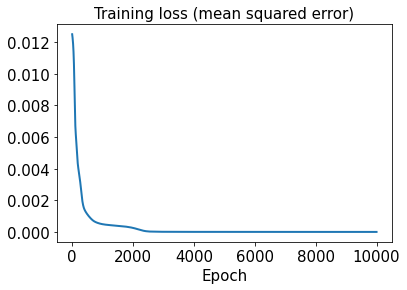

In [20]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

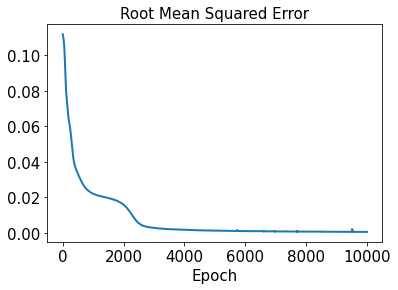

In [21]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [22]:
test_results = sd.evaluate(x_test)

1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [23]:
decoded_train = sd.predict(x_train)

In [24]:
decoded_test = sd.predict(x_test)

In [25]:
error_train_abs = np.abs(decoded_train - y_train)

In [26]:
error_train_abs[3]

array([[1.83225653e-04, 1.17768825e-04, 1.02166763e-04, ...,
        3.17495578e-05, 3.98717733e-04, 7.64323704e-05],
       [1.65572143e-04, 6.95102135e-05, 1.17298405e-05, ...,
        5.08691184e-04, 7.70172395e-04, 6.11325813e-05],
       [6.37015561e-04, 3.62185674e-05, 4.54034132e-04, ...,
        1.30542670e-04, 3.91478156e-04, 4.16540599e-04],
       ...,
       [1.14348317e-04, 3.46005254e-05, 8.45145551e-05, ...,
        2.06727651e-04, 3.66613269e-04, 1.53608125e-05],
       [7.20615863e-05, 2.03355739e-04, 6.75359042e-05, ...,
        2.22252667e-04, 1.96858688e-04, 4.88430378e-04],
       [1.06710831e-05, 5.46094030e-04, 1.81150477e-04, ...,
        8.10719212e-05, 4.44085483e-04, 4.46357299e-04]], dtype=float32)

In [27]:
np.min(error_train_abs[3])

1.4901161e-08

In [28]:
error_test_abs = np.abs(decoded_test - y_test)

In [29]:
x_train

array([[[ 2.65753e-01],
        [ 1.01126e-01],
        [-1.47719e-01],
        [-2.55263e-01],
        [ 2.21932e-01],
        [ 3.89315e-02],
        [-1.00238e-02],
        [-1.32588e-01],
        [ 1.28543e-01],
        [ 2.00198e-01],
        [-2.86081e-02],
        [ 1.04006e-01],
        [-1.42255e-01],
        [-1.51440e-01],
        [ 1.49730e-01]],

       [[ 5.90683e-02],
        [ 2.38036e-02],
        [-1.43529e-01],
        [-4.10071e-01],
        [ 1.36380e-01],
        [ 7.30410e-03],
        [-5.72383e-03],
        [-1.19393e-01],
        [ 3.45399e-01],
        [ 1.20995e-01],
        [ 1.00613e-01],
        [ 1.33782e-01],
        [-1.67724e-01],
        [-1.74455e-01],
        [ 1.65972e-01]],

       [[-2.52020e-01],
        [-3.99666e-02],
        [-1.57509e-01],
        [-1.83538e-01],
        [-4.04024e-04],
        [-1.13777e-01],
        [ 5.62016e-04],
        [-1.09031e-01],
        [ 3.60734e-01],
        [ 3.08757e-02],
        [ 2.48391e-01],
        [ 7.

In [30]:
x_test

array([[[ 1.81556e-01],
        [ 8.62653e-02],
        [-1.48622e-01],
        [-2.85895e-01],
        [ 2.28596e-01],
        [ 2.95704e-02],
        [-8.25743e-03],
        [-1.27584e-01],
        [ 1.95863e-01],
        [ 1.93845e-01],
        [ 7.85522e-03],
        [ 1.23690e-01],
        [-1.52076e-01],
        [-1.62708e-01],
        [ 1.61112e-01]],

       [[ 1.56633e-01],
        [-1.58924e-02],
        [-1.46592e-01],
        [-1.87903e-01],
        [ 1.20277e-01],
        [ 7.21961e-02],
        [ 2.86305e-02],
        [-1.15569e-01],
        [-1.60814e-01],
        [ 1.46948e-01],
        [ 9.78153e-02],
        [-1.76974e-02],
        [-1.39492e-01],
        [ 4.66345e-02],
        [ 1.34892e-01]],

       [[-2.68267e-01],
        [ 4.22151e-04],
        [-1.22462e-01],
        [ 5.54288e-01],
        [ 1.21773e-01],
        [ 2.54106e-01],
        [-6.97419e-03],
        [-1.72102e-01],
        [-2.72504e-01],
        [ 1.87994e-01],
        [-6.22562e-02],
        [-2.

In [31]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

2.940984e-05


In [32]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.14113662


In [33]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[2.2718881e-05, 2.3011808e-05, 3.953821e-05, 1.9220788e-05, 2.1699621e-05, 6.373909e-05, 1.9499394e-05, 2.1362257e-06, 3.5784196e-05, 2.445175e-05, 2.9209485e-05, 6.0022005e-05, 2.2299744e-05, 1.6947812e-05, 4.0906387e-05, 2.221757e-05, 2.885972e-07, 2.854577e-05, 2.5055153e-05, 4.9685106e-05, 5.0724375e-05, 2.3426517e-05, 2.9023971e-05, 2.0723877e-05, 4.5300705e-05]


In [34]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.009065969, 0.004510395, 0.0012776735, 0.07283692, 0.012250213, 0.01594858, 1.3331834, 0.020185173, 0.020721126, 0.0140666235, 0.042887174]


In [65]:
dm = np.delete(decoded_test, 6, axis=1)
tm = np.delete(y_test, 6, axis=1)
l2_error_test_modified = np.sum((dm-tm)**2) / np.sum(tm**2)
print(l2_error_test_modified)

0.13916251


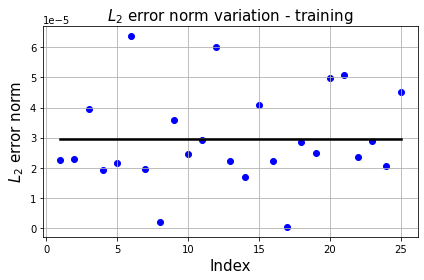

In [35]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

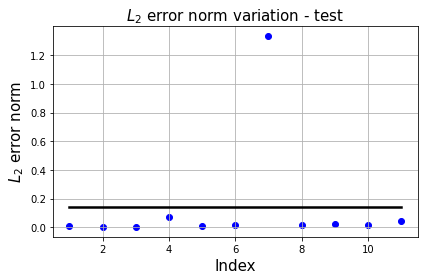

In [36]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

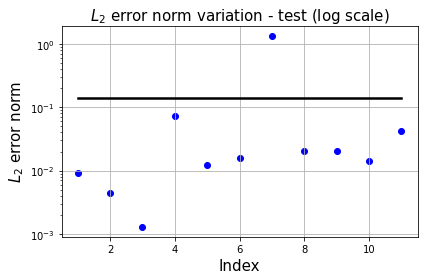

In [37]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.yscale('log')
plt.title('$L_2$ error norm variation - test (log scale)', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

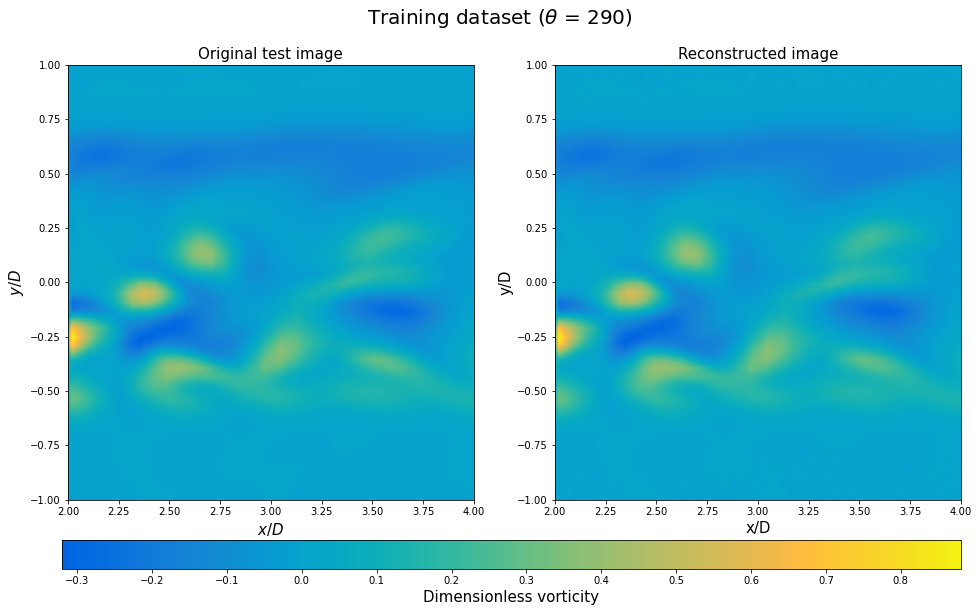

In [38]:
plt.figure(figsize=(16, 8))
y_train3_rotate = y_train[3].T.reshape(100, 100)
decoded_rotate = decoded_train[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\theta$ = 290)',fontsize=20)
plt.show()

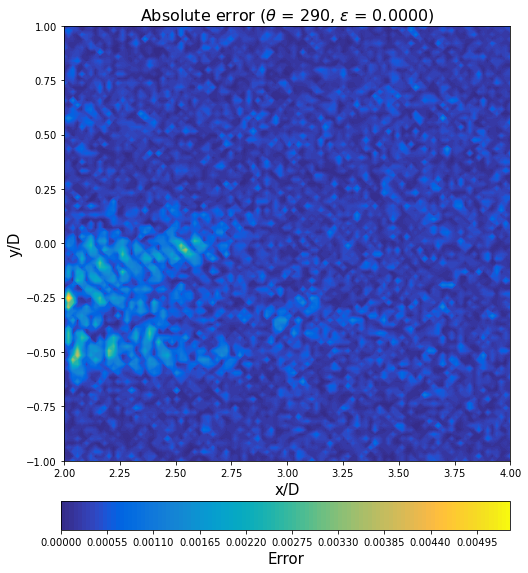

In [39]:
error_train_abs3_rotate = error_train_abs[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 290, $\epsilon$ = %.4f)' %(l2_error_train_list[3]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

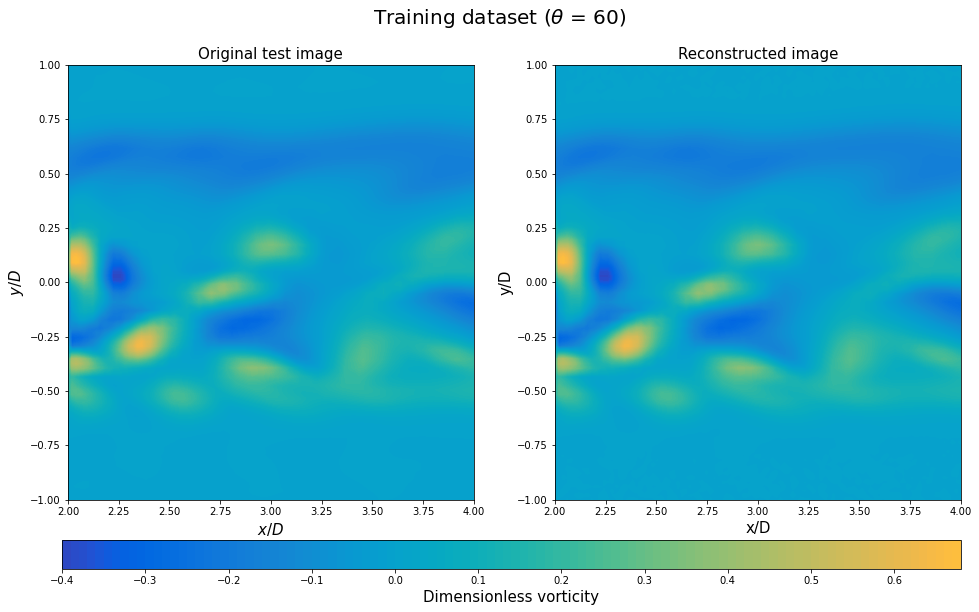

In [40]:
plt.figure(figsize=(16, 8))
y_train21_rotate = y_train[-5].T.reshape(100, 100)
decoded_rotate = decoded_train[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train21_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\theta$ = 60)', fontsize=20)
plt.show()

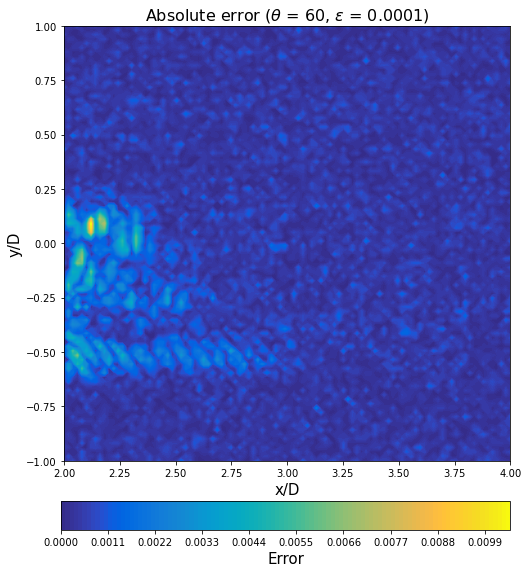

In [41]:
error_train_abs21_rotate = error_train_abs[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs21_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 60, $\epsilon$ = %.4f)' %(l2_error_train_list[-5]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

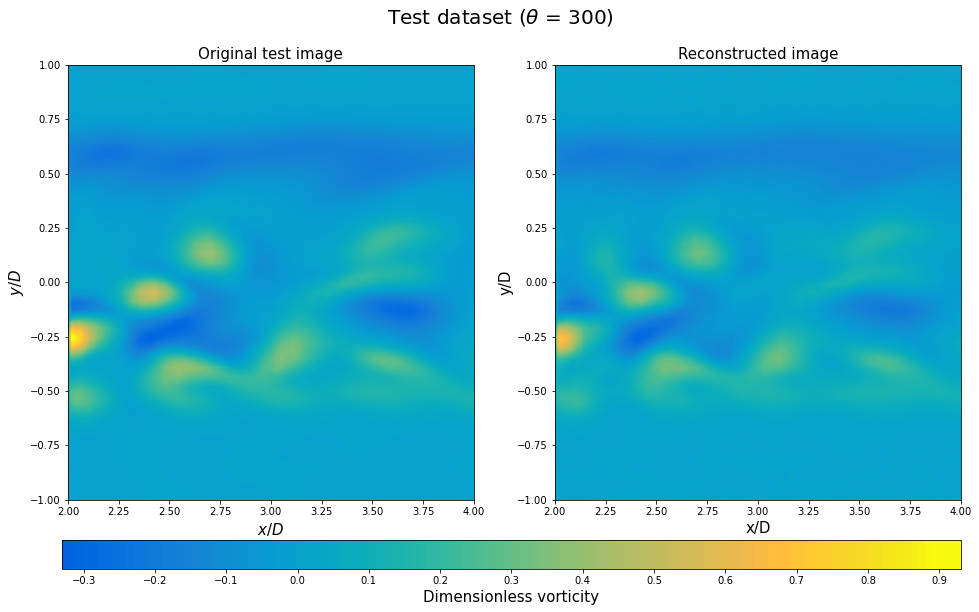

In [42]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\theta$ = 300)',fontsize=20)
plt.show()

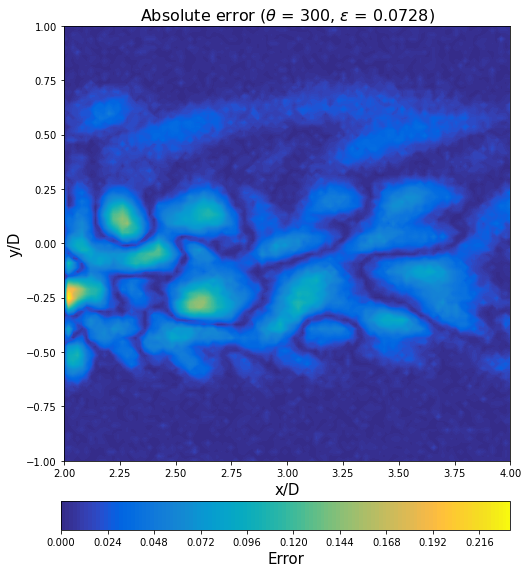

In [43]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 300, $\epsilon$ = %.4f)' %(l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

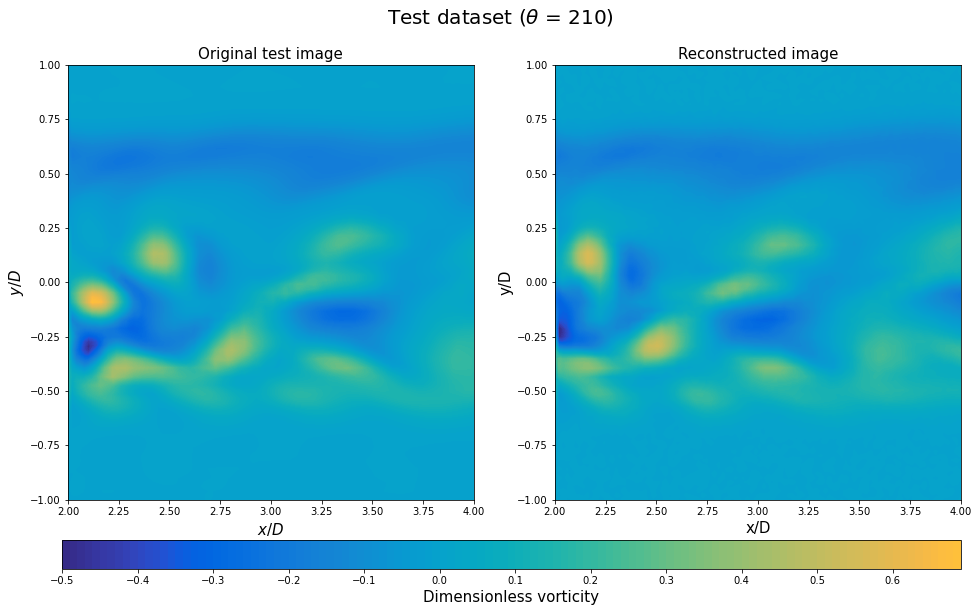

In [44]:
plt.figure(figsize=(16, 8))
y_test6_rotate = y_test[6].T.reshape(100, 100)
decoded_rotate = decoded_test[6].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test6_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\theta$ = 210)',fontsize=20)
plt.show()

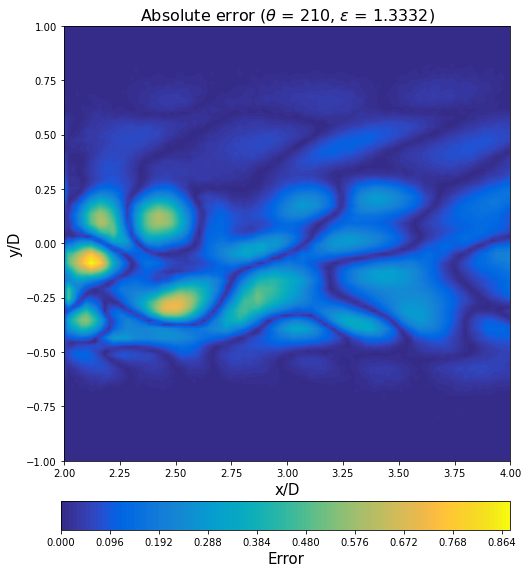

In [45]:
error_test_abs_rotate6 = error_test_abs[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs_rotate6, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 210, $\epsilon$ = %.4f)' %(l2_error_test_list[-5]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

In [46]:
vor_ytrain1_D200 = y_train[3].T[:, 0]
vor_ytrain1_D225 = y_train[3].T[:, 12]
vor_ytrain1_D250 = y_train[3].T[:, 24]
vor_ytrain2_D200 = y_train[-5].T[:, 0]
vor_ytrain2_D225 = y_train[-5].T[:, 12]
vor_ytrain2_D250 = y_train[-5].T[:, 24]
vor_ytest1_D200 = y_test[3].T[:, 0]
vor_ytest1_D225 = y_test[3].T[:, 12]
vor_ytest1_D250 = y_test[3].T[:, 24]
vor_ytest2_D200 = y_test[-5].T[:, 0]
vor_ytest2_D225 = y_test[-5].T[:, 12]
vor_ytest2_D250 = y_test[-5].T[:, 24]

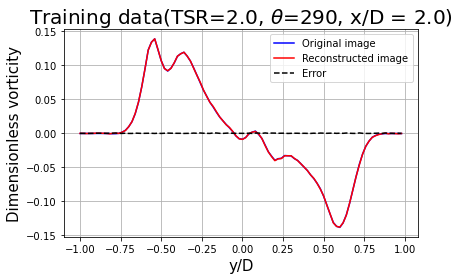

In [47]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D200, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D200.reshape(100,1)-decoded_train[3].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

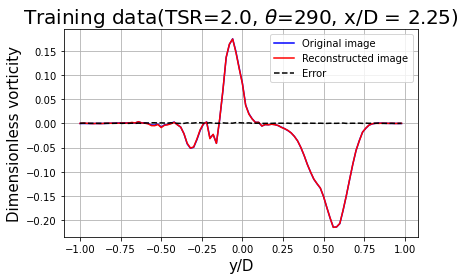

In [48]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D225, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D225.reshape(100,1)-decoded_train[3].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

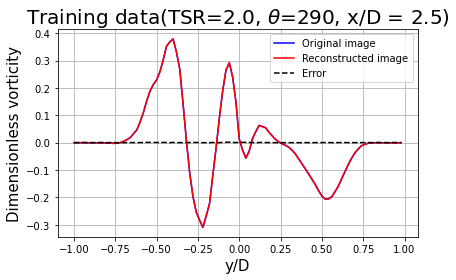

In [49]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D250, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D250.reshape(100,1)-decoded_train[3].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

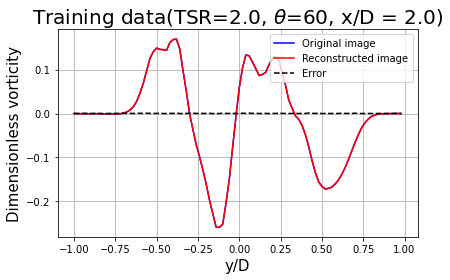

In [50]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D200, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D200.reshape(100,1)-decoded_train[-5].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

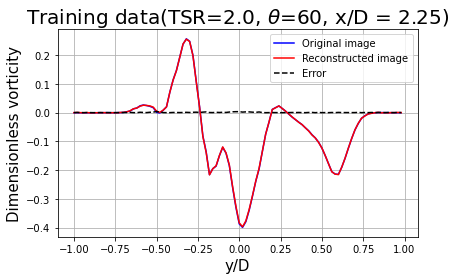

In [51]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D225, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D225.reshape(100,1)-decoded_train[-5].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

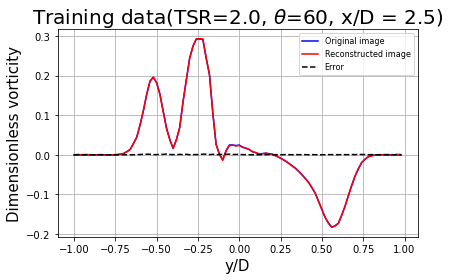

In [52]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D250, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D250.reshape(100,1)-decoded_train[-5].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right', fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

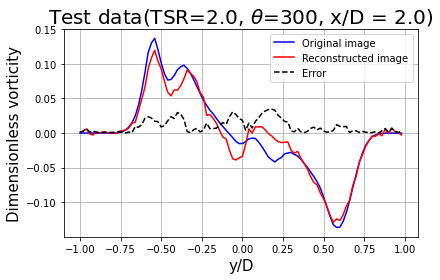

In [53]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D200.reshape(100,1)-decoded_test[3].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

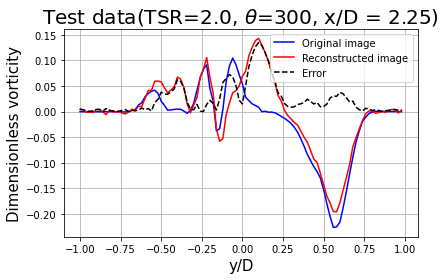

In [54]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D225.reshape(100,1)-decoded_test[3].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

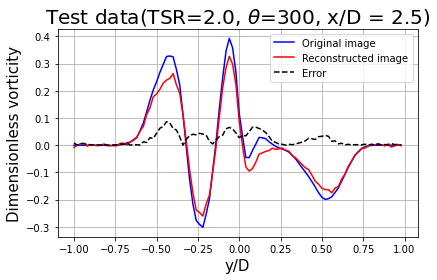

In [55]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D250.reshape(100,1)-decoded_test[3].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

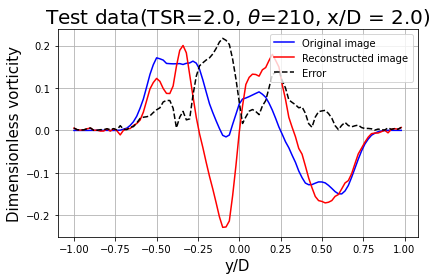

In [56]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D200.reshape(100,1)-decoded_test[-5].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

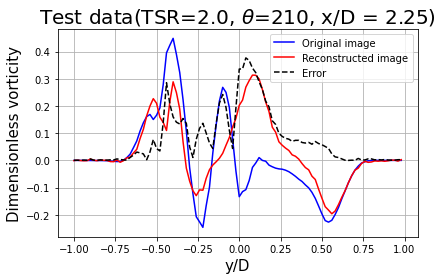

In [57]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D225.reshape(100,1)-decoded_test[-5].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

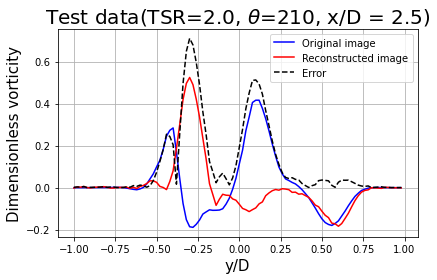

In [58]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D250.reshape(100,1)-decoded_test[-5].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

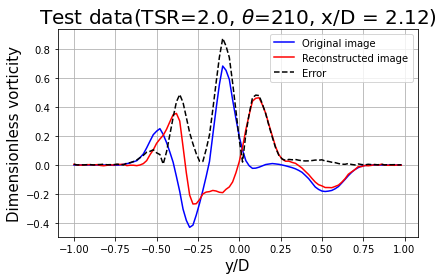

In [59]:
vor_ytest2_D212 = y_test[-5].T[:, 6]
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D212, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 6], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D212.reshape(100,1)-decoded_test[-5].T[:, 6].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.12)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()